<font size="7">

MSIN0143 Programming for Business Analytics

Group Project</font>

<font size="6">
A Study on the Effects of Socio-economic and Educational Mobility Factors on Income Redistribution Preferences<font></font>

<font size="4">

**Module Leader**: Dr. David Alderton

**Group**: Group2 BA_A2

**Word Count**: 1787 Words (except Table of Contents, References and Appendix)</font>

## Table of Contents
1. [Introduction](#1.-Introduction)
2. [Data Preparation](#2.-Data-Preparation)
   - [2-1. Data Sourcing](#2-1.-Data-Sourcing)
   - [2-2. Data Overview](#2-2.-Data-Overview)
3. [Data Cleaning & Visualization](#3.-Data-Cleaning-&-Visualization)
   - [3-1. Data Cleaning for Dependent/Independent Variables](#3-1.-Data-Cleaning-for-Dependent/Independent-Variables)
   - [3-2. Data Cleaning for Control Variables](#3-2.-Data-Cleaning-for-Control-Variables)
   - [3-3. Data Finalisation & Visualization](#3-3.-Data-Finalisation-&-Visualization)
4. [Predictive and Interpretive Modeling](#4.-Predictive-and-Interpretive-Modeling)
   - [4-1. Data Preparation for Modelling](#4-1.-Data-Preparation-for-Modelling)
   - [4-2. One-vs-All Logistic Regression](#4-2.-One-vs-All-Logistic-Regression)
   - [4-3. Naïve Bayes](#4-3.-Naïve-Bayes)
   - [4-4. Ensemble Methods](#4-4.-Ensemble-Methods)
   - [4-5. Interpretive Modelling Analysis](#4-5.-Interpretive-Modelling-Analysis)
     - [4-5-1. Standard Logistic Regression Interpretation](#4-5-1.-Standard-Logistic-Regression-Interpretation)
     - [4-5-2. K-Fold Cross-Validation for Model Robustness](#4-5-2.-K-Fold-Cross-Validation-for-Model-Robustness)
     - [4-5-3. Hyperparameter Tuning with GridSearchCV](#4-5-3.-Hyperparameter-Tuning-with-GridSearchCV)
5. [Limitations](#5.-Limitations)
6. [Summary](#6.-Summary)
7. [References](#7.-References)
8. [Appendix](#8.-Appendix)
   - [8-1. Table](#8-1.-Table)


## 1. Introduction
<a id="introduction"></a>

Income inequality has become a growing concern globally, affecting economic stability and individual opportunities. Understanding the factors influencing preferences for income redistribution is crucial for designing effective policies to address inequality. Intergenerational mobility, especially in education and social attitudes, are recognised as significant drivers of redistribution preferences (Jerrim & Macmillan, 2015; Lindh & Anderson, 2024). Additionally, preferences for income redistribution vary across countries, shaped by geographical and demographic factors (Alesina et al., 2018). 

Building on these insights, we aim to explore the question: "How do educational mobility, social attitudes, and sociodemographic factors affect preferences for income redistribution?" Using predictive models, we will identify the most influential factors in shaping redistribution preferences. Ultimately, this analysis can suppport decision-making for policymakers to create more equitable societies, where opportunities and resources are distributed more fairly.

## 2. Data Preparation
<a id="data-preparation"></a>
### 2-1. Data Sourcing
<a id="data-sourcing"></a>

In this study, analysis was performed using a total of two datasets, and necessary variables were extracted and integrated from each dataset. The primary dataset was sourced from the European Social Survey Multilevel data (ESS MD) Round 10, which collects cross-sectional data on public attitudes, values, and their interactions with European institutions and social indicators. Focusing on demographic and socioeconomic characteristics across 22 countries, this dataset included key variables such as preferences for income redistribution and educational mobility from surveys conducted between 2020 and 2022.

The second supporting dataset was extracted from the 2021 Regional Level EQI Dataset provided by the Quality of Government (QoG) Institute. This data contains European Quality Index (EQI) information at the regional level, which was combined with the first dataset to supplement the variables necessary to analyze the impact of social attitudes on the relationship between educational mobility and income redistribution preferences.

Through this data integration process, the necessary variables were organized and combined so that the research question, "How do social attitudes, trust, educational mobility, and perceptions of economic inequality affect preferences for income redistribution?" could be explored in more depth. 

In [7]:
#Import libraries and modules needed for the project

!pip install statsmodels

import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.formula.api import ols
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold

### 2-2. Data Overview
<a id="data-overview"></a>

We combined the main and supporting datasets using the NUTS2 regional identifier, focusing on selected countries present in both datasets, which was stored as "combined_data.csv", an uncleaned version of the final dataset.

In [9]:
# Our combined dataset has 24511 rows and 32 column over 14 countries.
# These are a large and representative sample of European countries, both in terms of welfare system and history.

data_file = "combined_data.csv"
combined_data = pd.read_csv(data_file, low_memory=False)

print(f"The combined dataset has {combined_data.shape[0]} rows and {combined_data.shape[1]} columns.")
combined_data.info()

The combined dataset has 24511 rows and 32 columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24511 entries, 0 to 24510
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   idno                  24511 non-null  int64  
 1   gincdif               24511 non-null  int64  
 2   nuts2                 21871 non-null  object 
 3   eisced                24511 non-null  int64  
 4   eiscedf               24511 non-null  int64  
 5   eiscedm               24511 non-null  float64
 6   domicil               24511 non-null  int64  
 7   n2_unrao25_2022       21862 non-null  float64
 8   wkhtot                24511 non-null  int64  
 9   ipeqopt               24511 non-null  int64  
 10  inprdsc               24511 non-null  int64  
 11  ppltrst               24511 non-null  int64  
 12  trstprl               24511 non-null  int64  
 13  gndr                  24511 non-null  int64  
 14  agea              

## 3. Data Cleaning & Visualisation
<a id="data-cleaning-for-dependent-independent-variables"></a>
### 3-1. Data Cleaning for Dependent/Independent Variables
<a id="data-cleaning-for-dependent-independent-variables"></a>

Our dependent variable of interest is preference for income redistribution, addressed in the question:
“Please say to what extent you agree or disagree with the following statement: The government should take measures to reduce differences in income levels’’. We simplified the five possible answers into 3 categories which takes the value of 1 for  “Agree” or “Strongly Agree”, 2 for “Neutral” and 3 for “ Disagree” or “Strongly Disagree”. 

In [13]:
#Create 'icn_redist' from 'gincidif' (dependent variable: Preference for income redistribution)

#Recoding "gincdif"
def recode_gincdif(value):
    if value in [1, 2]:  # Agree and Agree strongly
        return 1
    elif value == 3:  # Neutral
        return 2
    elif value in [4, 5]:  # Disagree and Disagree strongly
        return 3
    elif value in [7, 8, 9]:  # Refusal, Don't know, No answer
        return np.nan
    else:
        return value

# Apply the recoding function to 'gincdif' and create 'inc_redist'
combined_data['inc_redist'] = combined_data['gincdif'].apply(recode_gincdif)

# Remove rows where 'inc_redist' has NaN values
combined_data.dropna(subset=['inc_redist'], inplace=True)

# Convert 'inc_redist' to integer type
combined_data['inc_redist'] = combined_data['inc_redist'].astype(int)

print("Value counts for 'inc_redist':")
print(combined_data['inc_redist'].value_counts())

#Summary statistics for 'inc_redist'
#This represents "the preference for income redistribution"
inc_redist_freq = combined_data['inc_redist'].value_counts(sort=False)
inc_redist_percent = (inc_redist_freq / inc_redist_freq.sum()) * 100

inc_redist_summary = pd.DataFrame({
    'Category': inc_redist_freq.index,
    'Frequency': inc_redist_freq.values,
    'Percent (%)': inc_redist_percent.values
}).sort_values(by='Category')

print("Summary Statistics for 'inc_redist':")
print(inc_redist_summary)

Value counts for 'inc_redist':
inc_redist
1    17889
2     3738
3     2536
Name: count, dtype: int64
Summary Statistics for 'inc_redist':
   Category  Frequency  Percent (%)
0         1      17889    74.034681
1         2       3738    15.469933
2         3       2536    10.495386


The key explanatory variable, Educational Mobility, measures the difference between the respondent's and their parents’ highest education levels, based on a 7-point International Standard Classification of Education (ISCED) scale [0,6] to ensure cross-country consistency (Appendix 8-3). This difference is rescaled to a 13-point scale [0,12], where 6 indicates no mobility, values above 6 reflect upward mobility, and values below 6 indicate downward mobility. This measure captures whether the respondent's educational level has risen, declined, or remained the same as the parents’ and is summarized by analyzing the frequency and distribution of educational attainment across respondents and their parents for comparison and interpretation.

In [16]:
# Educational Mobility for father and mother, respectively. 

# Filter respondents aged 25 or older.
# We assume that most individuals typically completed their formal education by age 25. 
if 'agea' in combined_data.columns:
    combined_data = combined_data[combined_data['agea'] >= 25]
    combined_data.reset_index(drop=True, inplace=True)
else:
    print("Column 'agea' does not exist in the DataFrame.")

#Recode education levels
def recode_education(value):
    if value in [0, 77, 88, 99]:  # Excluded values
        return np.nan
    elif value == 1:  # Less than lower secondary
        return 0
    elif value == 2:  # Lower secondary
        return 1
    elif value == 3:  # Low-tier upper secondary
        return 2
    elif value == 4:  # Upper-tier upper secondary
        return 3
    elif value == 5:  # Advanced, non-university
        return 4
    elif value == 6:  # Bachelor's degree
        return 5
    elif value == 7:  # Master's degree or above
        return 6
    else:  # Unexpected values
        return np.nan

# Check columns before applying recoding
education_columns = ['eisced', 'eiscedf', 'eiscedm']
for col in education_columns:
    if col in combined_data.columns:
        combined_data[f"{col}_recode"] = combined_data[col].apply(recode_education).astype('Int64')
    else:
        print(f"Column '{col}' does not exist in the DataFrame.")

# Rename recoded columns to expected names if they exist
if 'eisced_recode' in combined_data.columns:
    combined_data.rename(columns={'eisced_recode': 'resp_ed'}, inplace=True)
if 'eiscedf_recode' in combined_data.columns:
    combined_data.rename(columns={'eiscedf_recode': 'fath_ed'}, inplace=True)
if 'eiscedm_recode' in combined_data.columns:
    combined_data.rename(columns={'eiscedm_recode': 'moth_ed'}, inplace=True)

#Calculate educational mobility variables
if {'resp_ed', 'fath_ed', 'moth_ed'}.issubset(combined_data.columns):
    combined_data['educ_mob_father'] = (
        combined_data['resp_ed'] - combined_data['fath_ed'] + 6
    ).astype('Int64')
    combined_data['educ_mob_mother'] = (
        combined_data['resp_ed'] - combined_data['moth_ed'] + 6
    ).astype('Int64')

    # Mark mobility variables as NaN for rows where inputs are NaN
    combined_data.loc[
        combined_data[['resp_ed', 'fath_ed']].isnull().any(axis=1), 
        'educ_mob_father'
    ] = np.nan
    combined_data.loc[
        combined_data[['resp_ed', 'moth_ed']].isnull().any(axis=1), 
        'educ_mob_mother'
    ] = np.nan

    # Drop rows with NaN in the independent variables
    combined_data = combined_data.dropna(subset=['educ_mob_father', 'educ_mob_mother'])

# Drop the original education-related columns if they exist
for col in education_columns:
    if col in combined_data.columns:
        combined_data.drop(columns=col, inplace=True)

# Ensure mobility columns are of type float
columns_to_convert = ['educ_mob_father', 'educ_mob_mother', 'resp_ed', 'fath_ed', 'moth_ed']
for col in columns_to_convert:
    if col in combined_data.columns:
        combined_data[col] = combined_data[col].astype(float)

# Check the first few rows of the cleaned dataset
columns_to_check = ['inc_redist', 'resp_ed', 'fath_ed', 'moth_ed', 'educ_mob_father', 'educ_mob_mother']
existing_columns = [col for col in columns_to_check if col in combined_data.columns]
print(combined_data[existing_columns].head())

   inc_redist  resp_ed  fath_ed  moth_ed  educ_mob_father  educ_mob_mother
0           2      5.0      4.0      4.0              7.0              7.0
1           1      6.0      5.0      5.0              7.0              7.0
2           2      4.0      1.0      1.0              9.0              9.0
3           1      2.0      3.0      0.0              5.0              8.0
4           1      6.0      1.0      0.0             11.0             12.0


In [18]:
# Summary of the distribution of each variable
# We calculate the frequency and ratio of the survey respondent's final educational background and educational mobility with parents. 

# Function to calculate frequency and percentage
def calculate_summary(data, column_name):
    # Frequency counts
    freq = data[column_name].value_counts(sort=False)
    # Percentages
    percentage = (freq / freq.sum()) * 100
    # Create a summary DataFrame
    summary = pd.DataFrame({
        'Frequency (total)': freq,
        'Percent (% total)': percentage
    }).sort_index()
    # Add Total Row
    total_row = pd.DataFrame({
        'Frequency (total)': [freq.sum()],
        'Percent (% total)': [100.0]
    }, index=['Total'])
    return pd.concat([summary, total_row])

# Ensure all variables are properly converted to integers before summary
combined_data['resp_ed'] = combined_data['resp_ed'].astype(float)
combined_data['educ_mob_father'] = combined_data['educ_mob_father'].astype(float)
combined_data['educ_mob_mother'] = combined_data['educ_mob_mother'].astype(float)

# Calculate summary for "resp_ed" (Highest Education)
highest_education_summary = calculate_summary(combined_data, 'resp_ed')

# Calculate summary for "educ_mob_father" (Educational Mobility with Father)
educ_mob_father_summary = calculate_summary(combined_data, 'educ_mob_father')

# Calculate summary for "educ_mob_mother" (Educational Mobility with Mother)
educ_mob_mother_summary = calculate_summary(combined_data, 'educ_mob_mother')

# Display summaries
print("Summary Statistics for Highest Education:")
print(highest_education_summary)

print("\nSummary Statistics for Educational Mobility with Father:")
print(educ_mob_father_summary)

print("\nSummary Statistics for Educational Mobility with Mother:")
print(educ_mob_mother_summary)

Summary Statistics for Highest Education:
       Frequency (total)  Percent (% total)
0.0                 1448           7.375713
1.0                 2427          12.362469
2.0                 2610          13.294621
3.0                 5500          28.015485
4.0                 1989          10.131418
5.0                 2429          12.372657
6.0                 3229          16.447637
Total              19632         100.000000

Summary Statistics for Educational Mobility with Father:
       Frequency (total)  Percent (% total)
0.0                    4           0.020375
1.0                   18           0.091687
2.0                   57           0.290342
3.0                  247           1.258150
4.0                  381           1.940709
5.0                  800           4.074980
6.0                 6037          30.750815
7.0                 3999          20.369804
8.0                 3218          16.391606
9.0                 2593          13.208028
10.0                

Each parent's educational mobility was averaged, and the average mobility variable (edu_mob_avg) of parents was newly created and added to the data. For visualisation, the average mobility of parents was categorized into netural(1), downward(2), and upward(3). 

Summary Statistics for Average Educational Mobility (educ_mob_avg):
count    19632.000000
mean         7.422270
std          1.650771
min          0.000000
25%          6.000000
50%          7.000000
75%          8.500000
max         12.000000
Name: educ_mob_avg, dtype: float64


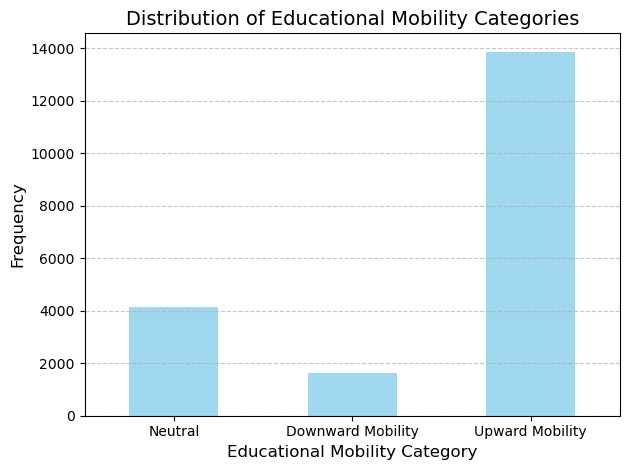

In [21]:
# Educational mobility for parents

# Calculate the average educational mobility
combined_data['educ_mob_avg'] = (
    combined_data['educ_mob_father'] + combined_data['educ_mob_mother']
) / 2

# Summary statistics for educ_mob_avg
print("Summary Statistics for Average Educational Mobility (educ_mob_avg):")
print(combined_data['educ_mob_avg'].describe())

# Categorize educ_mob_avg into discrete categories and map them to integers
def categorize_avg_mobility(value):
    if value == 6:
        return 0  # Neutral
    elif value < 6:
        return 1  # Downward Mobility
    elif value > 6:
        return 2  # Upward Mobility
    else:
        return np.nan  # Handle unexpected values as NaN

# Apply the categorization and ensure integer type
combined_data['educ_mob_avg_category'] = combined_data['educ_mob_avg'].apply(categorize_avg_mobility).astype(int)

# Data visualisation for the average mobility of parents 
# Map category codes to meaningful names
category_labels = {0: "Neutral", 1: "Downward Mobility", 2: "Upward Mobility"}
category_counts = combined_data['educ_mob_avg_category'].value_counts().sort_index()

# Plot
category_counts.plot(kind='bar', color='skyblue', alpha=0.8)
plt.title("Distribution of Educational Mobility Categories", fontsize=14)
plt.xlabel("Educational Mobility Category", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

# Set custom x-axis labels
plt.xticks(ticks=range(len(category_counts)), labels=[category_labels[cat] for cat in category_counts.index], rotation=0)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

For all variables except the outcome and main explanatory variables, we applied consistent cleaning methods. Categorical variables were simplified by redefining categories, while continuous variables were restricted to appropriate ranges. Missing values were handled by temporarily setting them as NaN, ensuring no rows were dropped prematurely, preserving valuable information from other variables for analysis.

In [24]:
# Three variables were processed: EQI index (eqi21_n2), residential type (domicil), and NUTS2 youth unemployment (n2_unrao25_2022).

# Independent variable : EQI index
# For the EQI index, error values were processed as NaN after converting to numbers.
# After that, the EQI category was created by categorizing it into four stages (Bottom, Third, Second, Top). 

# Ensure 'eqi21_n2' is numeric (coerce errors to NaN)
combined_data['eqi21_n2'] = pd.to_numeric(combined_data['eqi21_n2'], errors='coerce')

# Check for missing values in 'eqi21_n2'
missing_count = combined_data['eqi21_n2'].isnull().sum()
print(f"Missing values in 'eqi21_n2': {missing_count}")

# EQI Categories and Domicile Variable Processing
# Define EQI categories using pd.qcut
combined_data['EQI'] = pd.qcut(
    combined_data['eqi21_n2'], 
    q=4,  # 4 quartiles
    labels=[0, 1, 2, 3] 
)

# Convert EQI to integer for consistency
combined_data['EQI'] = combined_data['EQI'].astype(int)

# Check the distribution of EQI categories
print("EQI Categories Distribution:")
print(combined_data['EQI'].value_counts())

# Independent variable: domicil 
# The domicil regarded the 7, 8, and 9 values judged to be outliers as missing data and stored as a new domicile variable. 

# Replace missing values (7, 8, 9) with NaN in the domicil variable
combined_data['domicile'] = combined_data['domicil'].replace({7: np.nan, 8: np.nan, 9: np.nan})

# Check the distribution of the domicile variable after processing
domicile_summary = combined_data['domicile'].value_counts(dropna=False)
print("\nDomicile Categories Distribution (Including Missing Values):")
print(domicile_summary)

# Drop the original 'domicil' column
combined_data.drop(columns=['domicil'], inplace=True)

# Indepndent variable : unemp_nuts2
# The unemployment rate was categorized into six stages for convenience of interpretation, 
# and the missing values were preserved to prevent data loss or distortion.

# Unemployment in NUTS2 Region
# Check summary statistics for 'n2_unrao25_2022'
summary_statistics = combined_data['n2_unrao25_2022'].describe()
print("Summary Statistics for 'n2_unrao25_2022':")
print(summary_statistics)

# Check for missing values
missing_values = combined_data['n2_unrao25_2022'].isnull().sum()
print(f"\nNumber of missing values in 'n2_unrao25_2022': {missing_values}")

# Define the categorization function
def categorize_unemployment_rate(value):
    if pd.isnull(value):
        return None  # Preserve missing values
    elif value < 2:
        return 0
    elif 2 <= value < 4:
        return 1
    elif 4 <= value < 6:
        return 2
    elif 6 <= value < 8:
        return 3
    elif 8 <= value < 10:
        return 4
    else:  # value >= 10
        return 5

# Apply the categorization
combined_data['unemp_nuts2'] = combined_data['n2_unrao25_2022'].apply(categorize_unemployment_rate)

# Convert 'unemp_nuts2' to integer, preserving NaN values
combined_data['unemp_nuts2'] = combined_data['unemp_nuts2'].astype('Int64')

# Verify the new column
print("\nValue Counts for 'unemp_nuts2':")
print(combined_data['unemp_nuts2'].value_counts(dropna=False))

Missing values in 'eqi21_n2': 0
EQI Categories Distribution:
EQI
1    5050
0    4939
3    4899
2    4744
Name: count, dtype: int64

Domicile Categories Distribution (Including Missing Values):
domicile
4.0    6743
3.0    6191
1.0    4218
2.0    1571
5.0     890
NaN      19
Name: count, dtype: int64
Summary Statistics for 'n2_unrao25_2022':
count    17455.000000
mean         4.208215
std          1.798932
min          1.200000
25%          2.900000
50%          3.900000
75%          5.700000
max         10.300000
Name: n2_unrao25_2022, dtype: float64

Number of missing values in 'n2_unrao25_2022': 2177

Value Counts for 'unemp_nuts2':
unemp_nuts2
1       7101
2       5475
3       2427
<NA>    2177
0       1985
4        394
5         73
Name: count, dtype: Int64


In [26]:
# Processing and analyzing 'wkhtot' variable (Weekly working hours)

# Check unique values and their counts in the 'wkhtot' column
wkhtot_values = combined_data['wkhtot'].value_counts()
print("Unique Values and Counts in 'wkhtot':")
print(wkhtot_values)

# Identify rows where 'wkhtot' is greater than 168
# Values exceeding 24*7=168 were judged as outliers and all were treated with NaN.
values_above_168 = combined_data[combined_data['wkhtot'] > 168]
print(f"\nNumber of rows where 'wkhtot' > 168: {len(values_above_168)}")

# Data corresponding to unrealisticlly long working hours (e.g., between 100 and 168 hours) were also checked.

# Count rows where 'wkhtot' is between 100 and 168
values_between_100_and_168 = combined_data[(combined_data['wkhtot'] > 100) & (combined_data['wkhtot'] <= 168)]
print(f"Number of rows where 'wkhtot' is between 100 and 168: {len(values_between_100_and_168)}")

# A total of 91 data were identified.
# 91 data would not significantly affect the interpretation of the results, so we decided to maintain the corresponding data.

# Decide threshold based on above analysis (default: >168)

# Define the list of unusual values
unusual_values = [666, 777, 888, 999]

# Replace these unusual values with NaN
combined_data['wkhtot'] = combined_data['wkhtot'].replace(unusual_values, np.nan)

# Check how many values were replaced
num_replaced = combined_data['wkhtot'].isnull().sum()
print(f"\nNumber of values replaced with NaN: {num_replaced}")

# Identify rows where 'wkhtot' > 168 and replace with NaN
combined_data.loc[combined_data['wkhtot'] > 168, 'wkhtot'] = np.nan

# Replace unusual values (666, 777, 888, 999) with NaN
unusual_values = [666, 777, 888, 999]
combined_data['wkhtot'] = combined_data['wkhtot'].replace(unusual_values, np.nan)

# Count how many values were replaced with NaN
num_replaced = combined_data['wkhtot'].isnull().sum()
print(f"\nTotal number of values replaced with NaN (including >168 and unusual values): {num_replaced}")

# Calculate summary statistics for 'wkhtot' after replacing unusual values with NaN
wkhtot_summary = combined_data['wkhtot'].describe()
print("\nSummary Statistics for 'wkhtot' after cleaning:")
print(wkhtot_summary)

# Count rows where 'wkhtot' is between 100 and 168
values_between_100_and_168 = combined_data[(combined_data['wkhtot'] > 100) & (combined_data['wkhtot'] <= 168)]
print(f"\nNumber of rows where 'wkhtot' is between 100 and 168: {len(values_between_100_and_168)}")

# Display summary statistics for 'wkhtot'
print("\nFinal Summary Statistics for 'wkhtot':")
print(wkhtot_summary)

Unique Values and Counts in 'wkhtot':
wkhtot
40     6815
50     1399
888    1160
45     1113
666     958
       ... 
112       1
142       1
128       1
61        1
86        1
Name: count, Length: 103, dtype: int64

Number of rows where 'wkhtot' > 168: 2397
Number of rows where 'wkhtot' is between 100 and 168: 91

Number of values replaced with NaN: 2397

Total number of values replaced with NaN (including >168 and unusual values): 2397

Summary Statistics for 'wkhtot' after cleaning:
count    17235.000000
mean        40.540064
std         14.862468
min          0.000000
25%         38.000000
50%         40.000000
75%         45.000000
max        168.000000
Name: wkhtot, dtype: float64

Number of rows where 'wkhtot' is between 100 and 168: 91

Final Summary Statistics for 'wkhtot':
count    17235.000000
mean        40.540064
std         14.862468
min          0.000000
25%         38.000000
50%         40.000000
75%         45.000000
max        168.000000
Name: wkhtot, dtype: float64


In [28]:
# The variables representing social characteristics.
# We could analyze how respondents' beliefs about social characteristics affect their preference for income redistribution.

# 'ideqopt' to 'eqaulity_importance'
# Check unique values in the 'ipeqopt' variable
ipeqopt_values = combined_data['ipeqopt'].unique()

# Independent variable: Important that people are treated equally and have equal opportunities
# Map the values in the 'ipeqopt' column to the new categories
combined_data['equality_importance'] = combined_data['ipeqopt'].map({
    1: 1,  # Combine category 1 and 2 into 1
    2: 1,  # Combine category 1 and 2 into 1
    3: 2,  # Combine category 3 and 4 into 2
    4: 2,  # Combine category 3 and 4 into 2
    5: 3,  # Combine category 5 and 6 into 3
    6: 3,  # Combine category 5 and 6 into 3
    7: np.nan,  # Map 7, 8, 9 to NaN
    8: np.nan,
    9: np.nan
})

# Ensure 'equality_importance' is converted to integer type, preserving NaN
combined_data['equality_importance'] = combined_data['equality_importance'].astype('Int64')

# Check the distribution of the new categories
print("\nValue Counts for 'equality_importance':")
print(combined_data['equality_importance'].value_counts(dropna=False))

# 'inprdsc' to 'social_ties'
# Check unique values in the 'inprdsc' variable
inprdsc_values = combined_data['inprdsc'].unique()

# Independent variable: How many people with whom you can discuss intimate and personal matters
# Simplify the 'inprdsc' variable and rename it to 'social_ties'
combined_data['social_ties'] = combined_data['inprdsc'].replace({
    0: 0,   # None
    1: 1,   # 1
    2: 2,   # 2
    3: 3,   # 3
    4: 4,   # 4-6 remains 4
    5: 5,   # 7-9 becomes 5 (simplified to "7 and more")
    6: 5,   # 10 or more also becomes 5 (simplified to "7 and more")
    77: np.nan,  # Refusal -> missing value (NaN)
    88: np.nan,  # Don't know -> missing value (NaN)
    99: np.nan   # No answer -> missing value (NaN)
})

# Convert 'social_ties' to integer type, preserving NaN
combined_data['social_ties'] = combined_data['social_ties'].astype('Int64')

# Count the frequency of each value
value_counts = combined_data['social_ties'].value_counts(dropna=False).reset_index()
value_counts.columns = ['Value', 'N*']  # Rename columns for clarity

# Calculate the percentage
total_valid = combined_data['social_ties'].notna().sum()  # Count of non-NaN values
value_counts['Valid'] = (value_counts['N*'] / total_valid * 100).round(1)

# Map category names to the values
category_mapping = {
    0: "None",
    1: "1",
    2: "2",
    3: "3",
    4: "4-6",
    5: "7 or more",
    np.nan: "Missing"
}
value_counts['Category'] = value_counts['Value'].map(category_mapping)

# Step 4: Rearrange columns to match the desired order
value_counts = value_counts[['Value', 'Category', 'N*', 'Valid']]

# Display the table
print("Social Ties Frequency Table:")
print(value_counts)

# 'ppltrst' to 'gen_trust'
# Check unique values in the 'ppltrst' variable
ppltrst_values = combined_data['ppltrst'].unique()

# Check the frequency of each category in 'ppltrst'
ppltrst_counts = combined_data['ppltrst'].value_counts().sort_index()

# Independent variable: Most people can be trusted or you can't be too careful
# Define a mapping for numerical simplified categories for general trust
trust_mapping_numerical = {
    0: 0,  # No Trust
    1: 1,  # Low Trust
    2: 1,  # Low Trust
    3: 1,  # Low Trust
    4: 2,  # Moderate Trust
    5: 2,  # Moderate Trust
    6: 2,  # Moderate Trust
    7: 3,  # High Trust
    8: 3,  # High Trust
    9: 3,  # High Trust
    10: 3, # High Trust
    77: np.nan,  # Missing values
    88: np.nan,  # Missing values
    99: np.nan   # Missing values
}

# Apply the mapping to the variable and rename the column to 'gen_trust'
combined_data['gen_trust'] = combined_data['ppltrst'].map(trust_mapping_numerical)

# Convert 'gen_trust' to integer type, preserving NaN
combined_data['gen_trust'] = combined_data['gen_trust'].astype('Int64')

# Check the counts for the new variable
gen_trust_counts = combined_data['gen_trust'].value_counts(dropna=False)
print("\nGeneral Trust Frequency Table:")
print(gen_trust_counts)

# 'trstprl' to 'gov_trust'
# Independent Variable: Trust in country's parliament
# Map original values to simplified categories

trust_mapping = {
    0: 0,                    # No Trust
    1: 1, 2: 1, 3: 1,        # Low Trust
    4: 2, 5: 2, 6: 2,        # Moderate Trust
    7: 3, 8: 3, 9: 3, 10: 3, # High Trust
    77: np.nan, 88: np.nan, 99: np.nan  # Missing values
}

# Apply the mapping to create a simplified column
combined_data['gov_trust'] = combined_data['trstprl'].map(trust_mapping)

# Check the counts for the new categories
simplified_counts = combined_data['gov_trust'].value_counts(dropna=False)
print(simplified_counts)


Value Counts for 'equality_importance':
equality_importance
1       13612
2        5232
3         597
<NA>      191
Name: count, dtype: Int64
Social Ties Frequency Table:
   Value   Category    N*  Valid
0      2          2  4987   25.8
1      3          3  4204   21.8
2      1          1  4036   20.9
3      4        4-6  3702   19.2
4      0       None  1335    6.9
5      5  7 or more  1058    5.5
6   <NA>    Missing   310    1.6

General Trust Frequency Table:
gen_trust
2       7456
3       6421
1       4229
0       1464
<NA>      62
Name: count, dtype: Int64
gov_trust
2.0    7255
1.0    4991
3.0    4676
0.0    2466
NaN     244
Name: count, dtype: int64


### 3-2. Data Cleaning for Control Variables
<a id="data-cleaning-for-control-variables"></a>
Now we will define the control variables and these variables were included to control for socio-economic, regional and local factors that might affect both preferences for income redistribution and educational mobility.

In [31]:
# The process of cleaning the data of the respondents' 'age', 'country','household's net income(income_decile)' and 'gender'.

# Control variable: age
# Replace 999 in 'agea' with NaN and ensure proper type
combined_data['agea'] = combined_data['agea'].replace(999, np.nan).astype('Int64')

# Summary statistics for 'agea'
age_summary = combined_data['agea'].describe()
print("Age Summary Statistics:")
print(age_summary)

# Control variable: country
# Convert the 'cntry' column to a categorical type
combined_data['cntry'] = combined_data['cntry'].astype('category')

# Display the unique categories and their counts
print("Country Frequency Table:")
print(combined_data['cntry'].value_counts())

# Control variable: Household's total net income
# Replace 77, 88, 99 with NaN
combined_data['income_decile'] = combined_data['hinctnta'].replace([77, 88, 99], np.nan).astype('Int64')

# Missing values counting for 'income_decile'
missing_values_count = combined_data['income_decile'].isnull().sum()

# Frequency and percentage for income decile
income_decile_counts = combined_data['income_decile'].value_counts(dropna=False).sort_index()
total_count = income_decile_counts.sum()
income_decile_percentage = (income_decile_counts / total_count) * 100

# Print income decile frequency and percentage table
print("\nIncome Decile Frequency and Percentage Table:")
print(f"{'Income Decile':<15} {'Frequency (total)':<20} {'Percent (% total)':<20}")
print("-" * 60)
for decile, count, percent in zip(income_decile_counts.index, income_decile_counts.values, income_decile_percentage.values.round(2)):
    label = "Missing" if pd.isna(decile) else int(decile)
    print(f"{label:<15} {count:<20} {percent:<20}")

# Control variable: gender
# Map the gender variable to binary format
gender_mapping = {
    1: 0,  # Male becomes 0
    2: 1   # Female becomes 1
}

# Apply the mapping
combined_data['gender'] = combined_data['gndr'].map(gender_mapping)

# Convert the gender column to integer type
combined_data['gender'] = combined_data['gender'].astype('Int64')  # 'Int64' allows for missing values (NaN)

# Drop the original 'gndr' column
combined_data = combined_data.drop(columns=['gndr'])

# Check the counts for the new variable
gender_counts = combined_data['gender'].value_counts(dropna=False)

# Display the counts
print(gender_counts)

Age Summary Statistics:
count      19492.0
mean     54.496101
std      16.035885
min           25.0
25%           41.0
50%           55.0
75%           67.0
max           90.0
Name: agea, dtype: Float64
Country Frequency Table:
cntry
BG    2345
IT    2170
CZ    1937
HU    1550
PT    1550
IE    1466
FR    1373
FI    1314
LT    1209
SK    1163
NL    1121
SI    1003
BE     990
HR     441
Name: count, dtype: int64

Income Decile Frequency and Percentage Table:
Income Decile   Frequency (total)    Percent (% total)   
------------------------------------------------------------
1               1209                 6.16                
2               1683                 8.57                
3               1646                 8.38                
4               1753                 8.93                
5               1752                 8.92                
6               1699                 8.65                
7               1789                 9.11                
8             

In [33]:
# The code below shows the data cleaning for four control variables:
# 1) whether an individual joined a trade union or similar organization (union_member) 
# 2) whether the household had children (child_ever)
# 3) legal marital status (martial_status)
# 4) whether they had been unemployed for more than 3 months (unemp_ever)

# 'mbtru': whether an individual joined a trade union or similar organization to 'union_member'
# Check all unique values in the 'mbtru' variable
unique_values_mbtru = combined_data['mbtru'].unique()

# Replace values in 'mbtru' with a Binary Variable
# Mapping: 0 = never/in the past (combining "yes, previously" and "no"), 1 = currently a member
mbtru_mapping = {
    1: 1,  # Currently a member
    2: 0,  # Yes, previously
    3: 0,  # No
    7: np.nan,  # Refusal
    8: np.nan,  # Don't know
    9: np.nan   # No answer
}

# Apply the mapping to the dataset
combined_data['union_member'] = combined_data['mbtru'].map(mbtru_mapping)

# Verify the replacement
# Count each category in the new variable
union_member_counts = combined_data['union_member'].value_counts(dropna=False)

# Print the counts for validation
print("\nUnion Membership Binary Variable Counts:")
print(union_member_counts)


# 'chldhe': whether the household had children to 'child_ever'
# Step 1: Check unique values in the 'chldhhe' variable
unique_values_chldhhe = combined_data['chldhhe'].unique()

# Map values to define the binary variable
# 0 = Never a child at home
# 1 = Child now or in the past
# 6, 7, 8, 9 = Missing values (mapped to NaN)
chldhhe_mapping = {
    1: 1,  # Yes, child now or in the past
    2: 0,  # No, never a child at home
    6: np.nan,  # Not applicable
    7: np.nan,  # Refusal
    8: np.nan,  # Don't know
    9: np.nan   # No answer
}

# Apply the mapping
combined_data['child_ever'] = combined_data['chldhhe'].map(chldhhe_mapping)

# Check the counts for the new binary variable
child_home_counts = combined_data['child_ever'].value_counts(dropna=False)
print("\nBinary Variable 'child_ever' Counts:")
print(child_home_counts)


# 'marsts': legal marital status to 'martial_status'
# Check unique values in the 'marsts' variable
unique_values_marsts = combined_data['marsts'].unique()

# Define the mapping for marital status
marital_status_mapping = {
    1: 1,  # Married/Civil Union
    2: 1,  # Married/Civil Union
    3: 2,  # Separated/Divorced
    4: 2,  # Separated/Divorced
    5: 3,  # Widowed
    6: 0,  # Single
    66: np.nan,  # Not applicable
    77: np.nan,  # Refusal
    88: np.nan,  # Don't know
}

# Apply the mapping to create a simplified categorical variable
combined_data['marital_status'] = combined_data['marsts'].map(marital_status_mapping)

# Check the counts for the new categorical variable
marital_status_counts = combined_data['marital_status'].value_counts(dropna=False)
print("\nCategorical Variable 'marital_status' Counts:")
print(marital_status_counts)


# 'uemp3m': whether they had been unemployed for more than 3 months to 'unemp_ever'
# Check unique values in the 'uemp3m' variable
unique_values_uemp3m = combined_data['uemp3m'].unique()

# Define the mapping for the binary variable
uemp3m_mapping = {
    1: 1,       # Yes
    2: 0,       # No
    7: np.nan,  # Refusal
    8: np.nan,  # Don't know
    9: np.nan   # No answer
}

# Apply the mapping to create the binary variable
combined_data['unemp_ever'] = combined_data['uemp3m'].map(uemp3m_mapping)

# Check the counts for the new binary variable
unemployed_3m_counts = combined_data['unemp_ever'].value_counts(dropna=False)
print("\nBinary Variable 'unemp_ever' Counts:")
print(unemployed_3m_counts)


Union Membership Binary Variable Counts:
union_member
0.0    17295
1.0     2248
NaN       89
Name: count, dtype: int64

Binary Variable 'child_ever' Counts:
child_ever
1.0    7454
NaN    7101
0.0    5077
Name: count, dtype: int64

Categorical Variable 'marital_status' Counts:
marital_status
NaN    10146
0.0     4436
2.0     2406
3.0     2069
1.0      575
Name: count, dtype: int64

Binary Variable 'unemp_ever' Counts:
unemp_ever
0.0    14367
1.0     5146
NaN      119
Name: count, dtype: int64


### 3-3. Data Finalisation & Visualisation
<a id="3-3-data-finalisation--visualisation"></a>
After all variables have been sorted out, the final data for correlation analysis and model training of each variable are summarized as follows. This process involves including only newly created variables and deleting unnecessary variables.

In [36]:
# Extract the list of variable names and print
variable_list = combined_data.columns.tolist()

# Drop unnecessary columns for analysis
columns_to_drop = [
    'ipeqopt',        # Replaced by 'equality_importance'
    'inprdsc',        # Replaced by 'social_ties'
    'ppltrst',        # Replaced by 'gen_trust'
    'trstprl',        # Replaced by 'gov_trust'
    'marsts',         # Replaced by 'marital_status'
    'chldhhe',        # Replaced by 'child_ever'
    'uemp3m',         # Replaced by 'unemp_ever'
    'mbtru',          # Not used in analysis
    'hinctnta',       # Replaced by 'income_decile'
    'c_gini_2020',    # Not used
    'c_gini_2021',    # Not used
    'c_gini_2022',    # Not used 
    'c_effectiveness_2020',  # Not used
    'c_effectiveness_2021',  # Not used
    'c_effectiveness_2022',   # Not used
    'n2_unrao25_2020',   # Not used
    'n2_unrao25_2021',   # Not used
    'n2_unrao25_2022'    # Not used
]

# Drop the columns
combined_data.drop(columns=columns_to_drop, inplace=True)

# Convert categorical variables to integer
categorical_columns = combined_data.select_dtypes(include=['category']).columns

for column in categorical_columns:
    combined_data[column] = combined_data[column].cat.codes.astype('Int64')

# Create a structured list of remaining variables with metadata
variable_list = []

for column in combined_data.columns:
    variable_info = {
        "Variable Name": column,                       # Column name
        "Data Type": str(combined_data[column].dtype),  # Data type
        "Unique Values": combined_data[column].nunique(),  # Number of unique values
    }
    variable_list.append(variable_info)

# Convert the list to a DataFrame for better visualization
variable_df = pd.DataFrame(variable_list)

# Display the updated variable list
print("\nUpdated Structured Variable List:")
print(variable_df)

# Save the updated variable list to a CSV file
variable_df.to_csv("updated_variable_list.csv", index=False)
print("\nUpdated variable list saved to 'updated_variable_list.csv'.")


Updated Structured Variable List:
            Variable Name Data Type  Unique Values
0                    idno     int64          11636
1                 gincdif     int64              5
2                   nuts2    object             88
3                  wkhtot   float64             99
4                    agea     Int64             66
5                   cntry     Int64             14
6                eqi21_n2   float64             88
7          eqi21_n2_lowME   float64             89
8         eqi21_n2_highME   float64             89
9              inc_redist     int64              3
10                resp_ed   float64              7
11                fath_ed   float64              7
12                moth_ed   float64              7
13        educ_mob_father   float64             13
14        educ_mob_mother   float64             13
15           educ_mob_avg   float64             24
16  educ_mob_avg_category     int64              3
17                    EQI     int64            

The below data visualization is a heat map that shows the correlation between the selected variables. The heat map provides a color representation of the correlation coefficients (range of values: -1 to 1) between each variable to help you see the relationship (positive correlation, negative correlation, free view) between the variables at a glance.

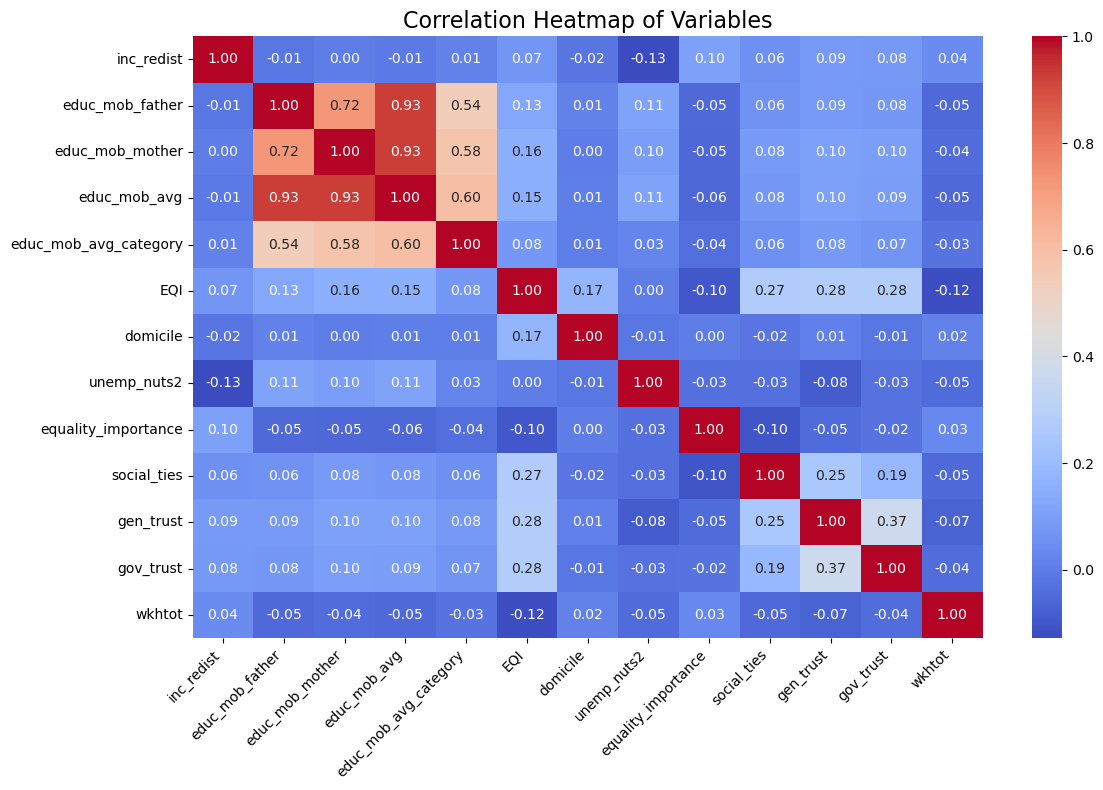

In [39]:
#Correlation heatmap for selected variables

# Define variables of interest for correlation testing
variables_of_interest = [
    'inc_redist',  # Dependent variable
    'educ_mob_father',
    'educ_mob_mother',
    'educ_mob_avg',
    'educ_mob_avg_category',
    'EQI',
    'domicile',
    'unemp_nuts2',
    'equality_importance',
    'social_ties',
    'gen_trust',
    'gov_trust',
    'wkhtot'
]

# Ensure all selected variables exist in the dataset
missing_vars = [var for var in variables_of_interest if var not in combined_data.columns]
if missing_vars:
    raise KeyError(f"The following variables are missing from the dataset: {missing_vars}")

# Subset the data for the selected variables
data_subset = combined_data[variables_of_interest]

# Compute the correlation matrix
correlation_matrix = data_subset.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Heatmap of Variables", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

The data visualisation below shows how the most important dependent variable, preference for income redistribution, appears in each country. Through this visualization, you can see the distribution and trend of dependent variables by country at a glance.

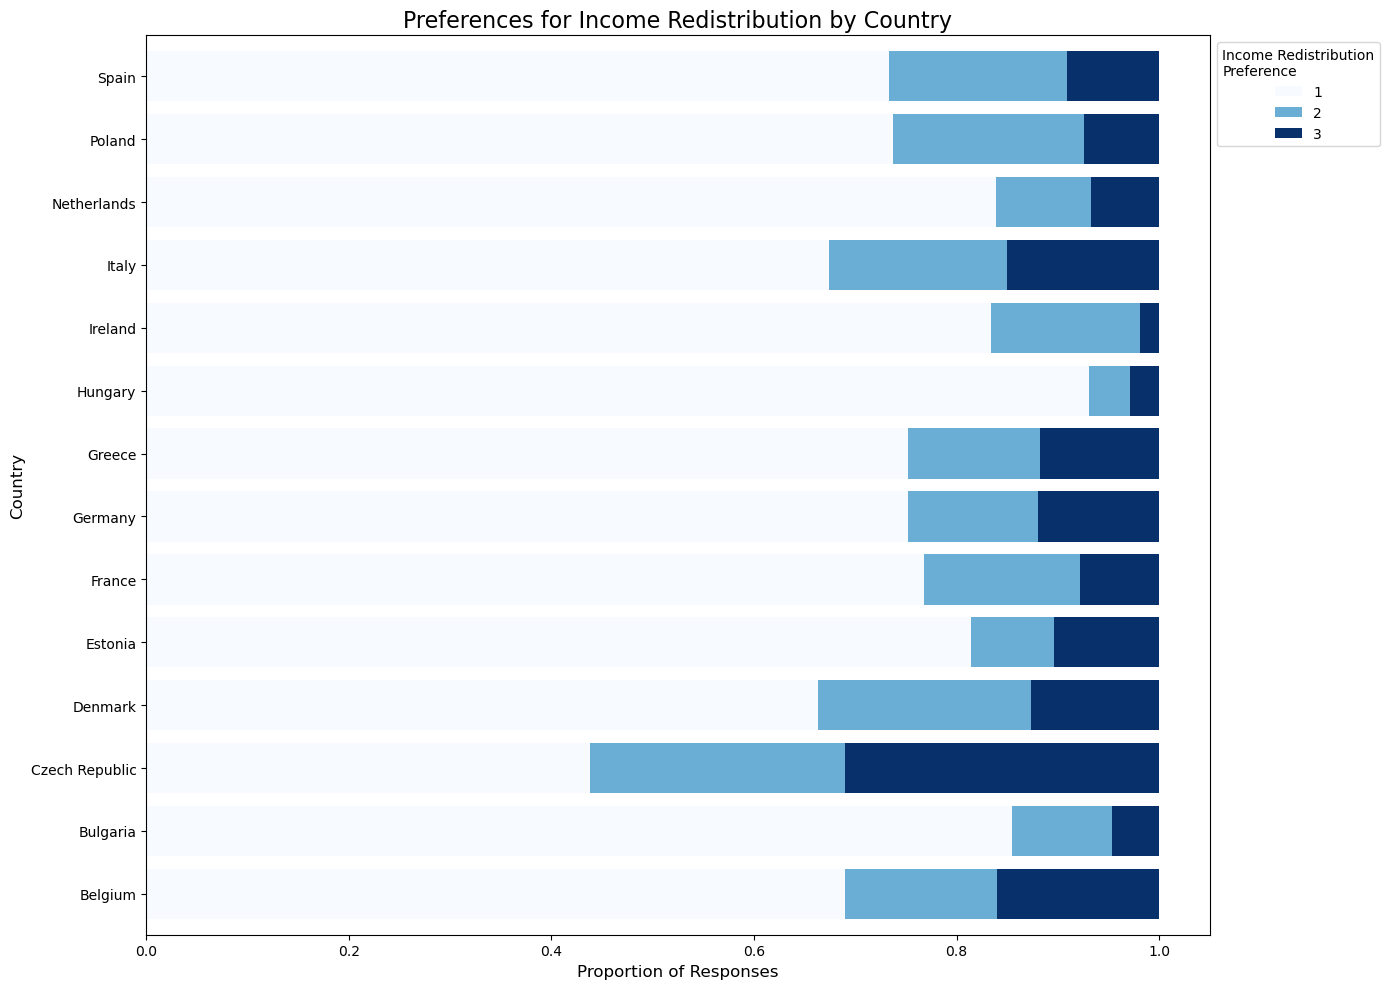

In [42]:
# `cntry` represents the countries and `inc_redist` represents the categorical preference for income redistribution.

# Define country mapping
country_mapping = {
    0: "Belgium",
    1: "Bulgaria",
    2: "Czech Republic",
    3: "Denmark",
    4: "Germany",
    5: "Estonia",
    6: "Ireland",
    7: "Greece",
    8: "Spain",
    9: "France",
    10: "Italy",
    11: "Hungary",
    12: "Netherlands",
    13: "Poland",
    # Add all your country mappings here
}

# Map country codes to country names
if 'cntry' in combined_data.columns:
    combined_data['cntry'] = combined_data['cntry'].map(country_mapping)
else:
    print("The column 'cntry' does not exist in the DataFrame.")

# Group data by country (`cntry`) and income redistribution category (`inc_redist`)
if {'cntry', 'inc_redist'}.issubset(combined_data.columns):
    pivot_table = combined_data.groupby(['cntry', 'inc_redist']).size().unstack(fill_value=0)

    # Normalize the data to percentages for each country
    normalized_pivot = pivot_table.div(pivot_table.sum(axis=1), axis=0)

    # Plot the stacked bar chart
    fig, ax = plt.subplots(figsize=(14, 10))
    normalized_pivot.plot(
        kind='barh',
        stacked=True,
        colormap='Blues',
        width=0.8,
        ax=ax
    )

    # Ensure country names are displayed on the y-axis
    ax.set_yticks(range(len(normalized_pivot.index)))
    ax.set_yticklabels(normalized_pivot.index, fontsize=10)

    # Add title and labels
    plt.title("Preferences for Income Redistribution by Country", fontsize=16)
    plt.xlabel("Proportion of Responses", fontsize=12)
    plt.ylabel("Country", fontsize=12)

    # Add legend
    plt.legend(
        title="Income Redistribution\nPreference",
        loc="upper left",
        bbox_to_anchor=(1.0, 1.0)
    )

    # Adjust layout to fit everything
    plt.tight_layout()

    # Display the chart
    plt.show()
else:
    print("Columns 'cntry' or 'inc_redist' are missing from the DataFrame.")

The below data visualisation is the expression of parents' educational mobility, the most important independent variable, for each country.

/var/folders/8_/b04pl0w94mg7rjmbvrtzsd6w0000gn/T/ipykernel_89811/2486503173.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=combined_data, x='educ_mob_avg', y='cntry_name', palette='coolwarm')


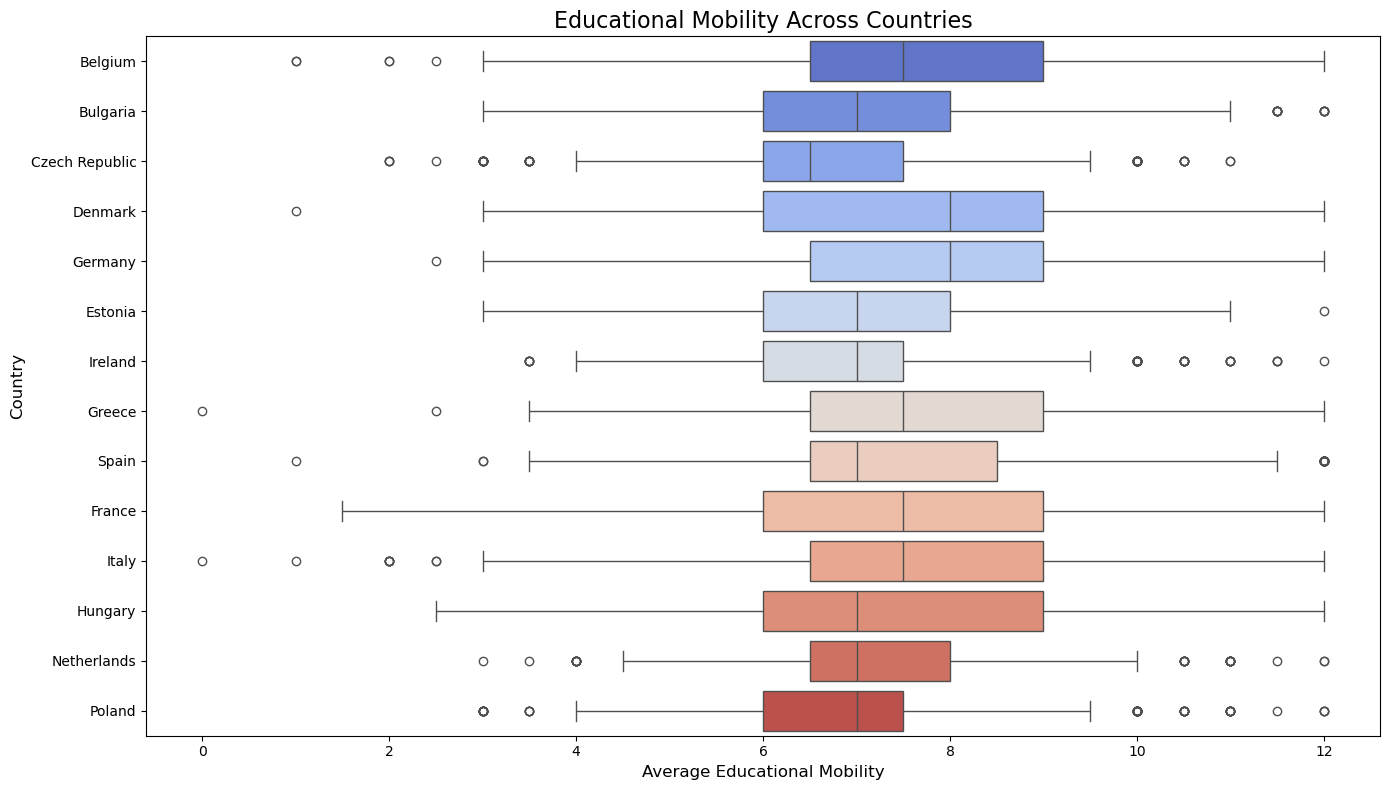

In [45]:
# Assuming you have a mapping of country codes to country names
country_mapping = {
    0: "Belgium",
    1: "Bulgaria",
    2: "Czech Republic",
    3: "Denmark",
    4: "Germany",
    5: "Estonia",
    6: "Ireland",
    7: "Greece",
    8: "Spain",
    9: "France",
    10: "Italy",
    11: "Hungary",
    12: "Netherlands",
    13: "Poland",
    # Add all your country mappings here
}

# Map the country codes to their names
if combined_data['cntry'].dtype.name == 'Int64':
    combined_data['cntry_name'] = combined_data['cntry'].map(country_mapping)
else:
    combined_data['cntry_name'] = combined_data['cntry']

# Create a boxplot for educational mobility across countries
plt.figure(figsize=(14, 8))
sns.boxplot(data=combined_data, x='educ_mob_avg', y='cntry_name', palette='coolwarm')

# Add title and axis labels
plt.title("Educational Mobility Across Countries", fontsize=16)
plt.xlabel("Average Educational Mobility", fontsize=12)
plt.ylabel("Country", fontsize=12)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

The last visualisation represents how the interaction term (e.g., educ_mob_avg_x_equality_importance) influences inc_redist. 

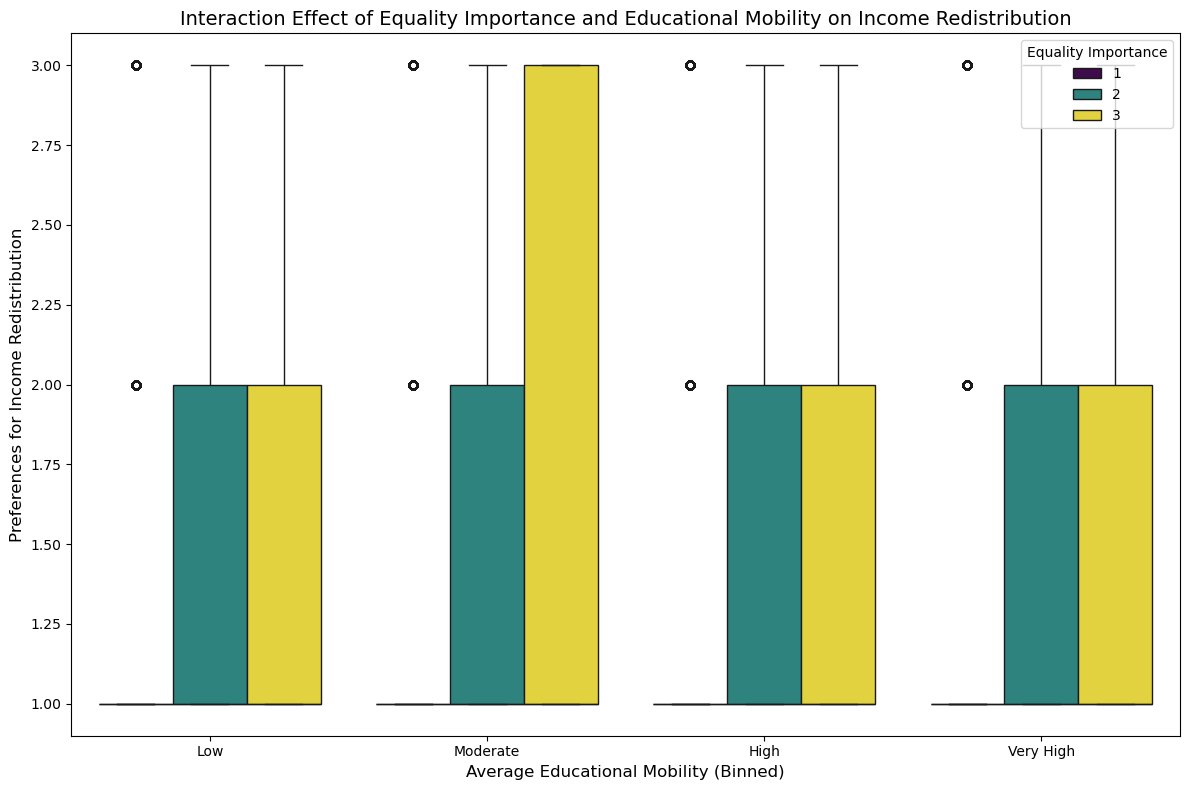

In [48]:
# Interaction Effect Plot
# Create a binned version of educational mobility for grouping
combined_data['educ_mob_avg_bins'] = pd.qcut(combined_data['educ_mob_avg'], q=4, labels=["Low", "Moderate", "High", "Very High"])

# Boxplot to show interaction between educational mobility and equality importance
plt.figure(figsize=(12, 8))
sns.boxplot(
    data=combined_data,
    x='educ_mob_avg_bins',
    y='inc_redist',
    hue='equality_importance',
    palette='viridis'
)

# Add titles and labels
plt.title("Interaction Effect of Equality Importance and Educational Mobility on Income Redistribution", fontsize=14)
plt.xlabel("Average Educational Mobility (Binned)", fontsize=12)
plt.ylabel("Preferences for Income Redistribution", fontsize=12)
plt.legend(title="Equality Importance", loc="upper right")
plt.tight_layout()
plt.show()

In [50]:
# Final checking for missing values before storing final dataset which we used for training the model. 

# Columns to check for missing values
columns_to_check = ['inc_redist', 'educ_mob_father', 'educ_mob_mother', 'educ_mob_avg']

# Check for missing values
missing_values = combined_data[columns_to_check].isnull().sum()

# Print the results
print("Missing Values in Key Columns:")
print(missing_values)

# Check if any rows have missing values in these columns
if missing_values.sum() == 0:
    print("\nNo missing values in the dependent variable and main predictors.")
else:
    print("\nMissing values are still present in the dataset.")

Missing Values in Key Columns:
inc_redist         0
educ_mob_father    0
educ_mob_mother    0
educ_mob_avg       0
dtype: int64

No missing values in the dependent variable and main predictors.


In [52]:
# Save the cleaned dataset to a CSV file
# This new cleanded dataset is the final dataset which we will use for our model training. 

cleaned_file_path = "cleaned_combined_data_1.csv" 
combined_data.to_csv(cleaned_file_path, index=False)
print(f"Cleaned dataset saved as '{cleaned_file_path}'.")

Cleaned dataset saved as 'cleaned_combined_data_1.csv'.


## 4. Predictive and Interpretive Modeling
<a id="predictive-analysis"></a>

In this study, the objective is twofold: firstly, to predict individuals' attitudes towards income redistribution based on various socioeconomic factors; and secondly, to interpret how these factors, particularly educational mobility, influence these attitudes. Given the categorical nature of the dependent variable (`inc_redist`), which captures respondents' stances as **"Agree," "Neutral," or "Disagree,"** a classification approach is appropriate. Initially, a **One-vs-All Logistic Regression** was employed due to its interpretability and suitability for multi-class problems. However, recognizing potential limitations in predictive performance, especially in the presence of class imbalance, alternative models such as **Naïve Bayes** and **ensemble methods** were explored to enhance accuracy.

### 4-1 Data Preparation for Modelling
<a id="data preparation for modelling"></a>

In [57]:
!pip install statsmodels
!pip install imblearn
!pip install ace_tools

# Load Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE

# Load the Data
data_path = "cleaned_combined_data_1.csv"
combined_data = pd.read_csv(data_path)

In [58]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Data Processing & Cleaning

# Create new feature
combined_data['age_squared'] = combined_data['agea'] ** 2

# Drop rows where critical variables are missing
critical_vars = ["educ_mob_avg_category"]  # Dependent variable & key predictor
combined_data = combined_data.dropna(subset=critical_vars)

# Impute missing values for secondary variables
continuous_vars = ["agea", "age_squared", "wkhtot"]  
for var in continuous_vars:
    combined_data[var].fillna(combined_data[var].median(), inplace=True)

categorical_vars = ["domicile", "unemp_nuts2", "EQI", "gender", "resp_ed", "income_decile",
                    "child_ever", "marital_status", "unemp_ever", "union_member", "gov_trust", "equality_importance"]
for var in categorical_vars:
    combined_data[var].fillna(combined_data[var].mode()[0], inplace=True)

# Add Social Attitudes Variables and Interaction Terms
combined_data['gov_trust_mob'] = combined_data['gov_trust'] * combined_data['educ_mob_avg']
combined_data['equality_mob'] = combined_data['equality_importance'] * combined_data['educ_mob_avg']

# Handle missing values for social attitudes
combined_data['gov_trust'].fillna(combined_data['gov_trust'].mode()[0], inplace=True)
combined_data['equality_importance'].fillna(combined_data['equality_importance'].mode()[0], inplace=True)

# Encode categorical variables
for cat_var in categorical_vars:
    combined_data[cat_var] = LabelEncoder().fit_transform(combined_data[cat_var])

# Standardize Continuous Variables
scaler = StandardScaler()
combined_data[continuous_vars] = scaler.fit_transform(combined_data[continuous_vars])

/var/folders/8_/b04pl0w94mg7rjmbvrtzsd6w0000gn/T/ipykernel_89811/26004395.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_data[var].fillna(combined_data[var].median(), inplace=True)
/var/folders/8_/b04pl0w94mg7rjmbvrtzsd6w0000gn/T/ipykernel_89811/26004395.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are s

In [61]:
# Define Variables

dependent_var = "inc_redist"
main_predictor = ["educ_mob_avg"]
main_predictor_cat = ["educ_mob_avg_category"]
control_vars = ["agea", "age_squared", "gender", "resp_ed", "income_decile",
                "child_ever", "marital_status", "unemp_ever", "union_member"]
regional_factors = ["domicile", "unemp_nuts2", "EQI"]
hours_worked = ["wkhtot"]
social_attitudes = ["gov_trust", "equality_importance"]
interaction_terms = ["gov_trust_mob", "equality_mob"]

# Handle Multicollinearity (VIF)

def calculate_vif(X):
    """Calculate Variance Inflation Factor (VIF) for each feature."""
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

# Define relevant features (EXCLUDE ID-like variables)
feature_columns = [
    "educ_mob_avg", "agea", "age_squared", "gender", "resp_ed", "income_decile",
    "child_ever", "marital_status", "unemp_ever", "union_member", "domicile",
    "unemp_nuts2", "EQI", "wkhtot", "gov_trust", "equality_importance",
    "gov_trust_mob", "equality_mob"
]

X_vif = combined_data[feature_columns].copy()

# Compute initial VIF
vif_df = calculate_vif(X_vif)
print("VIF Before Removing Multicollinearity:\n", vif_df)

# Drop high VIF features ("agea", "gov_trust", "equality_importance")
features_to_drop = ["agea", "gov_trust", "equality_importance"]
X_vif_filtered = X_vif.drop(columns=features_to_drop)

# Recompute VIF after removal
vif_df_after = calculate_vif(X_vif_filtered)
print("\nVIF After Removing High Multicollinearity Features:\n", vif_df_after)


VIF Before Removing Multicollinearity:
                 Feature         VIF
0          educ_mob_avg  102.567335
1                  agea   48.636602
2           age_squared   48.759839
3                gender    2.332810
4               resp_ed    8.355897
5         income_decile    6.023199
6            child_ever    4.465641
7        marital_status    1.701690
8            unemp_ever    1.452398
9          union_member    1.226919
10             domicile    3.823176
11          unemp_nuts2    3.697469
12                  EQI    3.438543
13               wkhtot    1.037974
14            gov_trust   32.670830
15  equality_importance   27.267449
16        gov_trust_mob   35.394955
17         equality_mob  146.265903

VIF After Removing High Multicollinearity Features:
            Feature        VIF
0     educ_mob_avg  29.996155
1      age_squared   1.526960
2           gender   2.273141
3          resp_ed   8.209621
4    income_decile   5.555781
5       child_ever   4.111970
6   marital_

In [63]:
# Scale Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_vif_filtered)  # Standardize feature set
X_scaled_df = pd.DataFrame(X_scaled, columns=X_vif_filtered.columns)
print("\nScaled Feature Set (First 5 rows):\n", X_scaled_df.head())


Scaled Feature Set (First 5 rows):
    educ_mob_avg  age_squared    gender   resp_ed  income_decile  child_ever  \
0     -0.255808     0.078046 -1.096755  0.967009       0.495799   -1.693178   
1     -0.255808     0.279249 -1.096755  1.516674       0.098739   -1.693178   
2      0.955778    -0.625320  0.911780  0.417344       0.098739    0.590605   
3     -0.558704     0.943728  0.911780 -0.681985       1.289918    0.590605   
4      2.470260    -0.174445 -1.096755  1.516674       1.289918    0.590605   

   marital_status  unemp_ever  union_member  domicile  unemp_nuts2       EQI  \
0       -0.558222   -0.596020     -0.359603  0.889474     1.613160  0.456530   
1       -0.558222    1.677797      2.780844 -0.765942    -0.537866  1.350199   
2       -0.558222    1.677797      2.780844 -1.593649    -1.613379  1.350199   
3        1.332240    1.677797     -0.359603  0.889474     2.688674  0.456530   
4       -0.558222   -0.596020     -0.359603  0.061766    -1.613379  1.350199   

     wk

In [65]:
# Train-Test Split
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Load your dataset
X = X_scaled_df  # Assuming X_scaled_df is your scaled feature matrix
y = combined_data["inc_redist"]  # Target variable

# Train-Test Split (DO THIS ONCE)
X_train_full, X_test_full, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Save indices to ensure consistency
train_indices = X_train_full.index
test_indices = X_test_full.index

print(f"Train size: {X_train_full.shape}, Test size: {X_test_full.shape}")


Train size: (13742, 15), Test size: (5890, 15)


In [67]:
# Feature Selection 
from sklearn.feature_selection import SelectKBest, mutual_info_classif, RFE
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np

def apply_feature_selection(X_train, X_test, y_train, method="mutual_info", num_features=10):
    """ Selects top features based on the specified method and applies to both train & test sets. """

    if method == "mutual_info":
        # Mutual Information Feature Selection
        selector = SelectKBest(score_func=mutual_info_classif, k=num_features)
        X_train_selected = selector.fit_transform(X_train, y_train)
        X_test_selected = selector.transform(X_test)  # Apply the same transformation to the test set

        # Retrieve selected feature names
        selected_features = X_train.columns[selector.get_support()]
        
        # Convert NumPy array back to DataFrame
        X_train_selected = pd.DataFrame(X_train_selected, columns=selected_features, index=X_train.index)
        X_test_selected = pd.DataFrame(X_test_selected, columns=selected_features, index=X_test.index)

    elif method == "RFE":
        # Recursive Feature Elimination (RFE)
        logreg = LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=500, class_weight="balanced")
        selector = RFE(logreg, n_features_to_select=num_features, step=1)
        selector.fit(X_train, y_train)
        selected_idx = np.where(selector.support_)[0]  # Get selected feature indices

        # Retrieve selected feature names
        selected_features = X_train.columns[selected_idx]

        # Subset the DataFrame to selected features
        X_train_selected = X_train[selected_features]
        X_test_selected = X_test[selected_features]

    else:
        raise ValueError("Unsupported feature selection method")

    print(f"🔹 Selected {num_features} Features: {list(selected_features)}")

    return X_train_selected, X_test_selected, selected_features


# Apply feature selection (Change method to 'mutual_info' or 'RFE' as needed)
X_train, X_test, selected_features = apply_feature_selection(
    X_train_full, X_test_full, y_train, method="RFE", num_features=10
)


🔹 Selected 10 Features: ['educ_mob_avg', 'resp_ed', 'income_decile', 'marital_status', 'unemp_ever', 'unemp_nuts2', 'EQI', 'wkhtot', 'gov_trust_mob', 'equality_mob']


### 4-2 One-vs-All Logistic Regression
<a id="one-vs-all logistic regression"></a>

The first attempt involved using a One-vs-All Logistic Regression model, where separate binary logistic models were trained for each category. This approach yielded an accuracy of approximately **74%**, but a deeper examination of the results revealed a significant limitation: the model was highly effective in predicting the **"Agree"** class while failing to classify **"Neutral"** and **"Disagree"** categories properly. 

Essentially, the model was merely mirroring the distribution of `inc_redist`, as most respondents supported redistribution. This class imbalance issue caused the model to disproportionately favor the majority class, rendering predictions for neutral and disagree cases highly inaccurate. 

The poor predictive power for these categories suggested that a logistic regression model, in its basic form, was insufficient for capturing nuanced relationships between predictors and all outcome classes.


In [70]:
# ===========================================
# Train One-vs-All Logistic Regression Models
# ===========================================

# Convert multi-class target to binary for each class
y_train_agree = (y_train == 1).astype(int)
y_train_neutral = (y_train == 2).astype(int)
y_train_disagree = (y_train == 3).astype(int)

y_test_agree = (y_test == 1).astype(int)
y_test_neutral = (y_test == 2).astype(int)
y_test_disagree = (y_test == 3).astype(int)

# Initialize logistic regression model
logreg = LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=500, class_weight="balanced")

# Train separate models
model_agree = logreg.fit(X_train, y_train_agree)
model_neutral = logreg.fit(X_train, y_train_neutral)
model_disagree = logreg.fit(X_train, y_train_disagree)



🔹 Classification Report for Agree vs. Others
              precision    recall  f1-score   support

           0       0.18      0.42      0.25      1507
           1       0.62      0.33      0.43      4383

    accuracy                           0.35      5890
   macro avg       0.40      0.38      0.34      5890
weighted avg       0.51      0.35      0.39      5890



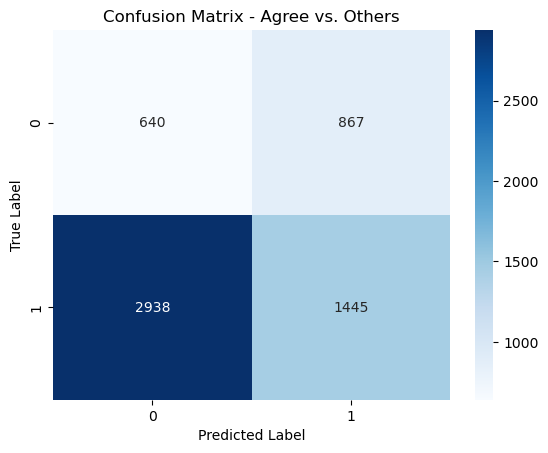


🔹 Classification Report for Neutral vs. Others
              precision    recall  f1-score   support

           0       0.89      0.63      0.74      5014
           1       0.20      0.53      0.29       876

    accuracy                           0.62      5890
   macro avg       0.54      0.58      0.51      5890
weighted avg       0.78      0.62      0.67      5890



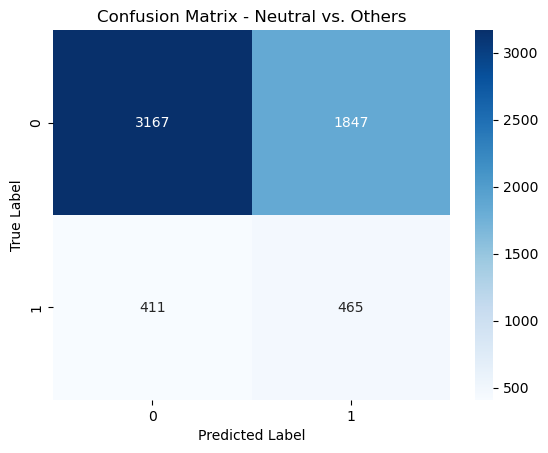


🔹 Classification Report for Disagree vs. Others
              precision    recall  f1-score   support

           0       0.94      0.64      0.76      5259
           1       0.17      0.64      0.27       631

    accuracy                           0.64      5890
   macro avg       0.55      0.64      0.52      5890
weighted avg       0.85      0.64      0.71      5890



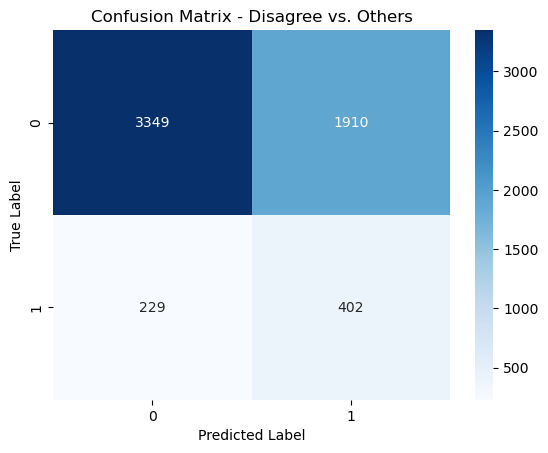

In [72]:
# Evaluate Performance
def evaluate_model(model, X_test, y_test, label):
    y_pred = model.predict(X_test)
    print(f"\n🔹 Classification Report for {label} vs. Others")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {label} vs. Others")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

# Evaluate all three models
evaluate_model(model_agree, X_test, y_test_agree, "Agree")
evaluate_model(model_neutral, X_test, y_test_neutral, "Neutral")
evaluate_model(model_disagree, X_test, y_test_disagree, "Disagree")



🔹 One-vs-All (OvA) Multi-Class Accuracy: 0.7441


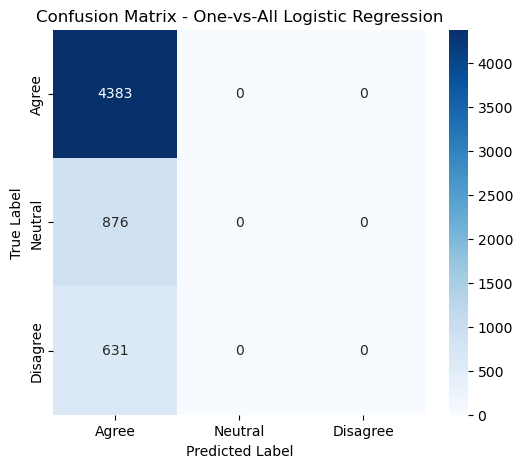

In [74]:
# Overall Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Get Probabilities Instead of Binary Predictions
y_prob_agree = model_agree.predict_proba(X_test)[:, 1]  # Probability of being "Agree"
y_prob_neutral = model_neutral.predict_proba(X_test)[:, 1]  # Probability of being "Neutral"
y_prob_disagree = model_disagree.predict_proba(X_test)[:, 1]  # Probability of being "Disagree"

# Stack Probabilities to Identify the Class with the Highest Confidence
y_prob_stack = np.vstack([y_prob_agree, y_prob_neutral, y_prob_disagree]).T

# Assign Final Predicted Label as the Class with Maximum Probability
y_pred_final = np.argmax(y_prob_stack, axis=1) + 1  # Adding 1 to match class labels {1,2,3}

# Compute One-vs-All Accuracy
ova_accuracy = accuracy_score(y_test, y_pred_final)
print(f"\n🔹 One-vs-All (OvA) Multi-Class Accuracy: {ova_accuracy:.4f}")

# Compute One-vs-All Confusion Matrix
cm_ova = confusion_matrix(y_test, y_pred_final)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_ova, annot=True, fmt="d", cmap="Blues", xticklabels=["Agree", "Neutral", "Disagree"], yticklabels=["Agree", "Neutral", "Disagree"])
plt.title("Confusion Matrix - One-vs-All Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


### 4-3 Naïve Bayes
<a id="naïve bayes"></a>


Given the poor performance of logistic regression on minority classes, the next attempt involved **Naïve Bayes**, a probabilistic classifier well-suited for high-dimensional data. While accuracy slightly decreased, classification for the **"Neutral"** and **"Disagree"** categories improved marginally. 

The improvement in predicting underrepresented classes scourced from **Naïve Bayes' reliance on probability distributions** rather than purely fitting decision boundaries. However, Naïve Bayes still struggled with precision for the **"Neutral"** class, indicating that linear assumptions might not sufficiently capture the complexity of the relationships in the data.


In [77]:
# =================================
# Change Model to Naïve Bayes Model
# =================================

from sklearn.naive_bayes import GaussianNB

# Define the Naïve Bayes Model
nb_model = GaussianNB()

# Convert multi-class target to binary for each class
y_train_agree = (y_train == 1).astype(int)
y_train_neutral = (y_train == 2).astype(int)
y_train_disagree = (y_train == 3).astype(int)

y_test_agree = (y_test == 1).astype(int)
y_test_neutral = (y_test == 2).astype(int)
y_test_disagree = (y_test == 3).astype(int)

# Train Separate One-vs-All Models
model_agree = nb_model.fit(X_train, y_train_agree)
model_neutral = nb_model.fit(X_train, y_train_neutral)
model_disagree = nb_model.fit(X_train, y_train_disagree)




🔹 Classification Report for Agree vs. Others
              precision    recall  f1-score   support

           0       0.25      0.99      0.40      1507
           1       0.36      0.00      0.01      4383

    accuracy                           0.25      5890
   macro avg       0.31      0.49      0.20      5890
weighted avg       0.34      0.25      0.11      5890



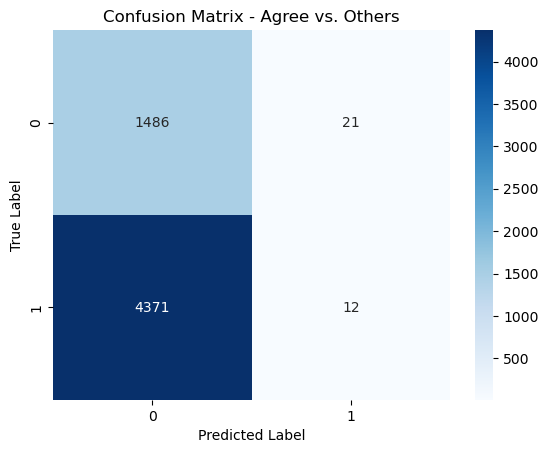


🔹 Classification Report for Neutral vs. Others
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      5014
           1       0.30      0.01      0.02       876

    accuracy                           0.85      5890
   macro avg       0.58      0.50      0.47      5890
weighted avg       0.77      0.85      0.78      5890



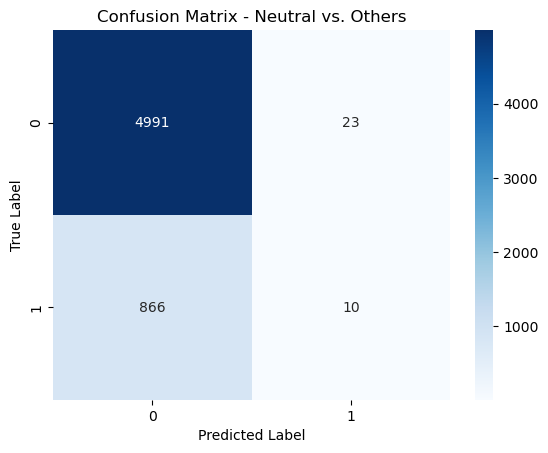


🔹 Classification Report for Disagree vs. Others
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      5259
           1       0.33      0.02      0.03       631

    accuracy                           0.89      5890
   macro avg       0.61      0.51      0.49      5890
weighted avg       0.83      0.89      0.84      5890



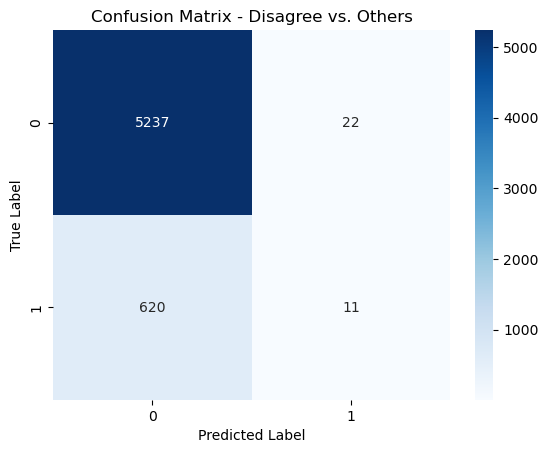

In [79]:
# Evaluate Performance
def evaluate_model(model, X_test, y_test, label):
    y_pred = model.predict(X_test)
    print(f"\n🔹 Classification Report for {label} vs. Others")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {label} vs. Others")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

# Evaluate all three models
evaluate_model(model_agree, X_test, y_test_agree, "Agree")
evaluate_model(model_neutral, X_test, y_test_neutral, "Neutral")
evaluate_model(model_disagree, X_test, y_test_disagree, "Disagree")

In [81]:
# Overall Evaluation with Optimized Threshold
from sklearn.metrics import precision_recall_curve

# Compute precision-recall curves
prec_agree, rec_agree, thresholds_agree = precision_recall_curve(y_test_agree, y_prob_agree)
prec_neutral, rec_neutral, thresholds_neutral = precision_recall_curve(y_test_neutral, y_prob_neutral)
prec_disagree, rec_disagree, thresholds_disagree = precision_recall_curve(y_test_disagree, y_prob_disagree)

# Compute F1 score for each threshold
f1_scores_agree = 2 * (prec_agree * rec_agree) / (prec_agree + rec_agree + 1e-9)
f1_scores_neutral = 2 * (prec_neutral * rec_neutral) / (prec_neutral + rec_neutral + 1e-9)
f1_scores_disagree = 2 * (prec_disagree * rec_disagree) / (prec_disagree + rec_disagree + 1e-9)

# Select threshold with highest F1 score
best_threshold_agree = thresholds_agree[np.argmax(f1_scores_agree)]
best_threshold_neutral = thresholds_neutral[np.argmax(f1_scores_neutral)]
best_threshold_disagree = thresholds_disagree[np.argmax(f1_scores_disagree)]

print(f"🔹 Optimized Threshold for Agree: {best_threshold_agree:.3f}")
print(f"🔹 Optimized Threshold for Neutral: {best_threshold_neutral:.3f}")
print(f"🔹 Optimized Threshold for Disagree: {best_threshold_disagree:.3f}")



🔹 Optimized Threshold for Agree: 0.094
🔹 Optimized Threshold for Neutral: 0.455
🔹 Optimized Threshold for Disagree: 0.580



🔹 One-vs-All (OvA) Multi-Class Accuracy After Threshold Adjustment: 0.6638


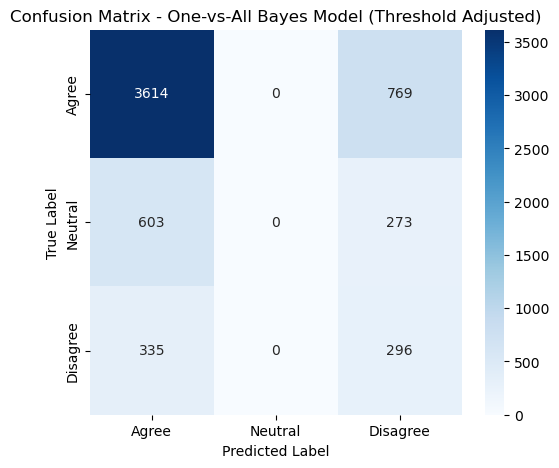

In [83]:
# Initialize predictions to class "Neutral" (default)
y_pred_final = np.full(len(X_test), 2)  # Neutral as default (Class 2)

# Assign class if probability exceeds the threshold
y_pred_final[y_prob_agree >= best_threshold_agree] = 1  # Assign "Agree" if threshold met
y_pred_final[y_prob_disagree >= best_threshold_disagree] = 3  # Assign "Disagree" if threshold met

# Compute One-vs-All Accuracy
ova_accuracy = accuracy_score(y_test, y_pred_final)
print(f"\n🔹 One-vs-All (OvA) Multi-Class Accuracy After Threshold Adjustment: {ova_accuracy:.4f}")

# Compute One-vs-All Confusion Matrix
cm_ova = confusion_matrix(y_test, y_pred_final)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_ova, annot=True, fmt="d", cmap="Blues", xticklabels=["Agree", "Neutral", "Disagree"], yticklabels=["Agree", "Neutral", "Disagree"])
plt.title("Confusion Matrix - One-vs-All Bayes Model (Threshold Adjusted)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


### 4-4 Ensemble Methods
<a id="ensemble methods"></a>

In [85]:
# Apply feature selection (Change method to 'mutual_info')
X_train, X_test, selected_features = apply_feature_selection(
    X_train_full, X_test_full, y_train, method="mutual_info", num_features=10
)


🔹 Selected 10 Features: ['educ_mob_avg', 'resp_ed', 'income_decile', 'child_ever', 'unemp_ever', 'unemp_nuts2', 'EQI', 'wkhtot', 'gov_trust_mob', 'equality_mob']


In [87]:
# Define One-vs-All Target Variables
ova_targets = {
    "Agree": ((y_train == 1).astype(int), (y_test == 1).astype(int)),
    "Neutral": ((y_train == 2).astype(int), (y_test == 2).astype(int)),
    "Disagree": ((y_train == 3).astype(int), (y_test == 3).astype(int)),
}

# Store binary datasets
ova_targets = {
    "Agree vs Others": (y_train_agree, y_test_agree),
    "Neutral vs Others": (y_train_neutral, y_test_neutral),
    "Disagree vs Others": (y_train_disagree, y_test_disagree)
}

Recognizing the inefficiency of training models separately, a **multi-model pipeline** was introduced, allowing simultaneous training of **Logistic Regression, Naïve Bayes, SVM, and Random Forest**. This approach streamlined the process while allowing a direct comparison among different models. 

The best-performing configuration emerged as a **combination of Random Forest for "Agree"** and **Naïve Bayes for "Neutral" and "Disagree"**. Final accuracy reached **60.12%**, showing an improvement over Naïve Bayes alone but still indicating room for better classification, particularly for the **"Neutral"** class, which remained challenging to predict accurately.


In [95]:
# =========================================
# Define and Train Multiple Models
# =========================================
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score

# Define models
models = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(kernel="linear", probability=True, class_weight="balanced"),
    "Random Forest": RandomForestClassifier(n_estimators=100, class_weight="balanced", random_state=42),
}
# Store results
model_results = {}

# Train models for each One-vs-All classification task
for class_label, (y_train_binary, y_test_binary) in ova_targets.items():
    print(f"\n🔹 Evaluating models for {class_label}")

    for name, model in models.items():
        print(f"\n🔸 {name} - {class_label}")

        # Create pipeline (scaling + model)
        pipeline = Pipeline([
            ("scaler", StandardScaler()),  # Scale features for all models
            ("classifier", model)
        ])

        # Train model
        pipeline.fit(X_train, y_train_binary)

        # Predict and evaluate
        y_pred_binary = pipeline.predict(X_test)

        # Store results
        model_results[(name, class_label)] = {
            "model": pipeline,
            "y_pred": y_pred_binary,
            "accuracy": accuracy_score(y_test_binary, y_pred_binary),
            "f1_score": f1_score(y_test_binary, y_pred_binary)
        }

        # Print classification report
        print(classification_report(y_test_binary, y_pred_binary))



🔹 Evaluating models for Agree vs Others

🔸 KNN - Agree vs Others
              precision    recall  f1-score   support

           0       0.41      0.23      0.30      1507
           1       0.77      0.89      0.82      4383

    accuracy                           0.72      5890
   macro avg       0.59      0.56      0.56      5890
weighted avg       0.68      0.72      0.69      5890


🔸 Naive Bayes - Agree vs Others
              precision    recall  f1-score   support

           0       0.42      0.16      0.23      1507
           1       0.76      0.93      0.84      4383

    accuracy                           0.73      5890
   macro avg       0.59      0.54      0.53      5890
weighted avg       0.68      0.73      0.68      5890


🔸 SVM - Agree vs Others
              precision    recall  f1-score   support

           0       0.36      0.61      0.45      1507
           1       0.82      0.62      0.71      4383

    accuracy                           0.62      5890
   m

,Model,Class,Accuracy,F1-Score
0,KNN,Agree vs Others,0.719185,0.824453
1,Naive Bayes,Agree vs Others,0.729881,0.836266
2,SVM,Agree vs Others,0.617997,0.707108
3,Random Forest,Agree vs Others,0.733616,0.835414
4,KNN,Neutral vs Others,0.832088,0.106594
5,Naive Bayes,Neutral vs Others,0.842105,0.064386
6,SVM,Neutral vs Others,0.584380,0.295742
7,Random Forest,Neutral vs Others,0.830730,0.086159
8,KNN,Disagree vs Others,0.887946,0.138381
9,Naive Bayes,Disagree vs Others,0.890832,0.030166


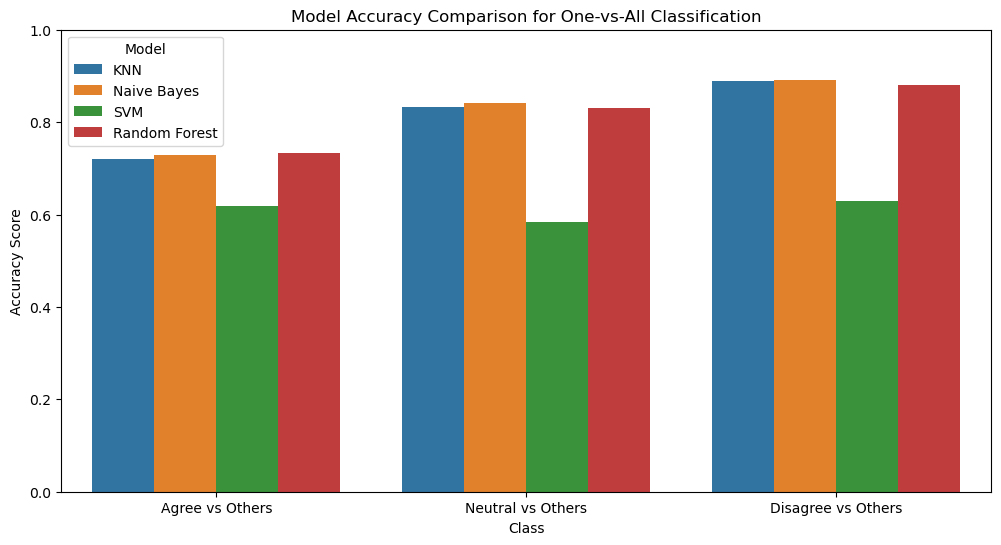

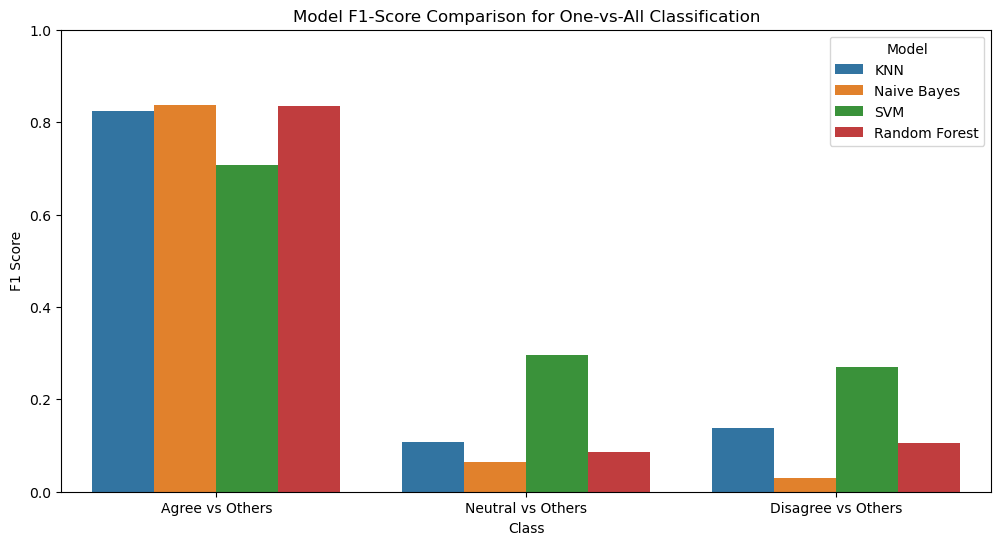

In [97]:
# Extract evaluation metrics for each model and class
evaluation_results = []
for (model_name, class_label), metrics in model_results.items():
    evaluation_results.append({
        "Model": model_name,
        "Class": class_label,
        "Accuracy": metrics["accuracy"],
        "F1-Score": metrics["f1_score"]
    })

# Convert to DataFrame for better visualization
evaluation_df = pd.DataFrame(evaluation_results)

# Display the evaluation metrics
from IPython.display import display
display(evaluation_df)

# Plot Accuracy and F1-score Comparison
plt.figure(figsize=(12, 6))
sns.barplot(x="Class", y="Accuracy", hue="Model", data=evaluation_df)
plt.title("Model Accuracy Comparison for One-vs-All Classification")
plt.xlabel("Class")
plt.ylabel("Accuracy Score")
plt.ylim(0, 1)
plt.legend(title="Model")
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x="Class", y="F1-Score", hue="Model", data=evaluation_df)
plt.title("Model F1-Score Comparison for One-vs-All Classification")
plt.xlabel("Class")
plt.ylabel("F1 Score")
plt.ylim(0, 1)
plt.legend(title="Model")
plt.show()

In [99]:
# Best Model Decision
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# Explicitly assign models for each One-vs-All task
model_agree = RandomForestClassifier(n_estimators=100, class_weight="balanced", random_state=42)  # Random Forest
model_neutral = GaussianNB()  # Naïve Bayes
model_disagree = GaussianNB()  # Naïve Bayes

# Train models with the correct assignments
model_agree.fit(X_train, y_train_agree)
model_neutral.fit(X_train, y_train_neutral)
model_disagree.fit(X_train, y_train_disagree)


GaussianNB()

In [101]:
# Get predicted probabilities using the correct models
y_prob_agree = model_agree.predict_proba(X_test)[:, 1]  # Random Forest
y_prob_neutral = model_neutral.predict_proba(X_test)[:, 1]  # Naïve Bayes
y_prob_disagree = model_disagree.predict_proba(X_test)[:, 1]  # Naïve Bayes


🔹 Optimized Threshold for Agree: 0.179
🔹 Optimized Threshold for Neutral: 0.114
🔹 Optimized Threshold for Disagree: 0.130

✅ Overall One-vs-All Accuracy (After Thresholding): 0.6012


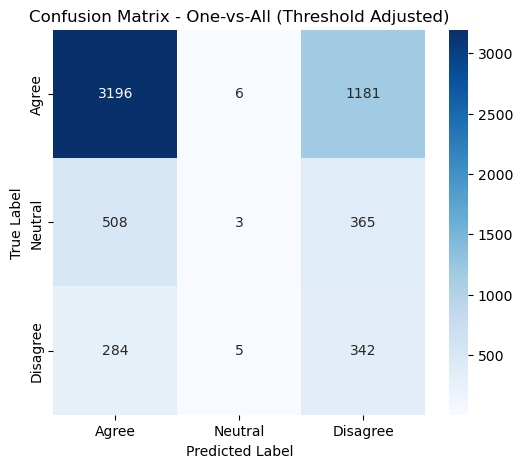

In [106]:
# Overal Evaluation with Optimized Threshold
import numpy as np
from sklearn.metrics import precision_recall_curve, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Compute precision-recall curves
prec_agree, rec_agree, thresholds_agree = precision_recall_curve(y_test_agree, y_prob_agree)
prec_neutral, rec_neutral, thresholds_neutral = precision_recall_curve(y_test_neutral, y_prob_neutral)
prec_disagree, rec_disagree, thresholds_disagree = precision_recall_curve(y_test_disagree, y_prob_disagree)

# Compute F1 score for each threshold
f1_scores_agree = 2 * (prec_agree * rec_agree) / (prec_agree + rec_agree + 1e-9)
f1_scores_neutral = 2 * (prec_neutral * rec_neutral) / (prec_neutral + rec_neutral + 1e-9)
f1_scores_disagree = 2 * (prec_disagree * rec_disagree) / (prec_disagree + rec_disagree + 1e-9)

# Select threshold with highest F1 score
best_threshold_agree = thresholds_agree[np.argmax(f1_scores_agree)]
best_threshold_neutral = thresholds_neutral[np.argmax(f1_scores_neutral)]
best_threshold_disagree = thresholds_disagree[np.argmax(f1_scores_disagree)]

print(f"🔹 Optimized Threshold for Agree: {best_threshold_agree:.3f}")
print(f"🔹 Optimized Threshold for Neutral: {best_threshold_neutral:.3f}")
print(f"🔹 Optimized Threshold for Disagree: {best_threshold_disagree:.3f}")


# APPLY THRESHOLD TO FINAL CLASSIFICATION

# Initialize predictions to "Neutral" (Class 2) as the default class
y_pred_final = np.full(len(X_test), 2)  # Default to Neutral

# Apply thresholding based on best F1 score thresholds
y_pred_final[y_prob_agree > best_threshold_agree] = 1   # Assign "Agree" if threshold met
y_pred_final[y_prob_disagree > best_threshold_disagree] = 3  # Assign "Disagree" if threshold met


# EVALUATE FINAL MODEL PERFORMANCE

# Compute One-vs-All Accuracy
overall_accuracy = accuracy_score(y_test, y_pred_final)
print(f"\n✅ Overall One-vs-All Accuracy (After Thresholding): {overall_accuracy:.4f}")

# Compute One-vs-All Confusion Matrix
cm_ova = confusion_matrix(y_test, y_pred_final)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_ova, annot=True, fmt="d", cmap="Blues", xticklabels=["Agree", "Neutral", "Disagree"], yticklabels=["Agree", "Neutral", "Disagree"])
plt.title("Confusion Matrix - One-vs-All (Threshold Adjusted)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

From Predictive modelling, **class imbalance** issue was noticed.

Efforts to mitigate **class imbalance** included techniques such as **Synthetic Minority Over-sampling Technique (SMOTE)** and **class weighting** during model training. However, these methods did not yield improved results and, in some cases, worsened performance. 

This outcome aligns with findings in the literature, where certain **imbalance correction methods** can distort model calibration and lead to **inaccurate probability estimates**. Given the real-world distribution of **attitudes towards income redistribution**, these techniques may not be suitable, as they could artificially alter the inherent data structure.


### 4-5 Interpretive Modelling Analysis
<a id="interpretive modelling"></a>

The **interpretive analysis** in this study focuses on understanding the role of **educational mobility** and key **socioeconomic factors** in shaping attitudes toward **income redistribution**, while controlling for **potential confounders**. 

Unlike **predictive modeling**, which prioritizes **classification accuracy**, the **interpretive models** aim to extract **meaningful insights** into how different features influence the likelihood of respondents **agreeing, remaining neutral, or disagreeing** with redistribution policies.


### 4-5-1 Standard Logistic Regression Interpretation
<a id="standard logistic regression interpretation"></a>

The first approach involved training a **One-vs-All Logistic Regression** model to estimate how **socioeconomic factors** influence attitudes toward **income redistribution**. This model was chosen for its **interpretability**, as each **coefficient** represents the **log-odds change** associated with a **one-unit increase** in the predictor variable, holding other factors constant.

The results highlighted **three key insights**:
1. **Educational mobility** was **positively associated** with support for redistribution, suggesting that those who experienced **upward mobility** recognize the role of **redistributive policies** in enabling economic progress.
2. **Higher-income individuals** were **significantly less likely** to support redistribution, aligning with **self-interest theories** that predict opposition to policies that may lead to **higher taxes** or **wealth transfers**.
3. **Trust in government** emerged as a **strong predictor**, reinforcing that individuals who have **confidence in state institutions** are more likely to believe in the **fairness and effectiveness** of redistributive policies.

However, while these **coefficients provide valuable insights**, logistic regression operates under the assumption of **linearity in the log-odds space** and does not account for potential **interactions** or **nonlinear effects** between predictors.


In [112]:
# Apply feature selection (Change method to 'RFE' as needed)
X_train_selected, X_test_selected, selected_features = apply_feature_selection(
    X_train_full, X_test_full, y_train, method="RFE", num_features=10
)

# Convert to DataFrame for statsmodels
X_train_selected_df = pd.DataFrame(X_train_selected, columns=selected_features)


🔹 Selected 10 Features: ['educ_mob_avg', 'resp_ed', 'income_decile', 'marital_status', 'unemp_ever', 'unemp_nuts2', 'EQI', 'wkhtot', 'gov_trust_mob', 'equality_mob']


In [114]:
# =======================================
# Compute Coefficients for Interpretation
# =======================================
import statsmodels.api as sm

# Train Models
ova_models = {}

for class_label, (y_train_binary, y_test_binary) in ova_targets.items():
    print(f"\n🔹 Training Logistic Regression for {class_label}")

    # Ensure indices are aligned
    X_train_sm = sm.add_constant(X_train_selected_df).reset_index(drop=True)
    y_train_binary = y_train_binary.reset_index(drop=True)

    # Fit Logistic Regression
    model = sm.Logit(y_train_binary, X_train_sm).fit()

    # Store model
    ova_models[class_label] = model

    # Print summary
    print(model.summary())



🔹 Training Logistic Regression for Agree vs Others
Optimization terminated successfully.
         Current function value: 0.531772
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             inc_redist   No. Observations:                13742
Model:                          Logit   Df Residuals:                    13731
Method:                           MLE   Df Model:                           10
Date:                Fri, 14 Feb 2025   Pseudo R-squ.:                 0.06477
Time:                        02:21:10   Log-Likelihood:                -7307.6
converged:                       True   LL-Null:                       -7813.7
Covariance Type:            nonrobust   LLR p-value:                4.328e-211
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.1638      0.021     54.922 


🔹 Evaluating Agree vs Others
✅ Accuracy for Agree vs Others: 0.7501


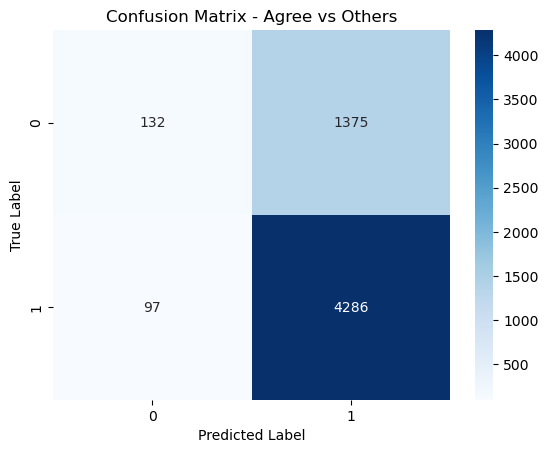


🔹 Evaluating Neutral vs Others
✅ Accuracy for Neutral vs Others: 0.8514


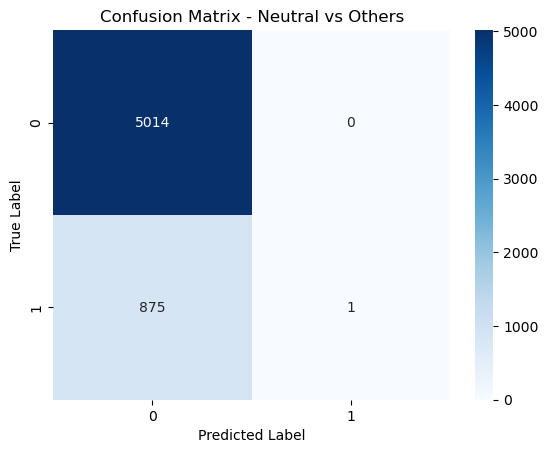


🔹 Evaluating Disagree vs Others
✅ Accuracy for Disagree vs Others: 0.8929


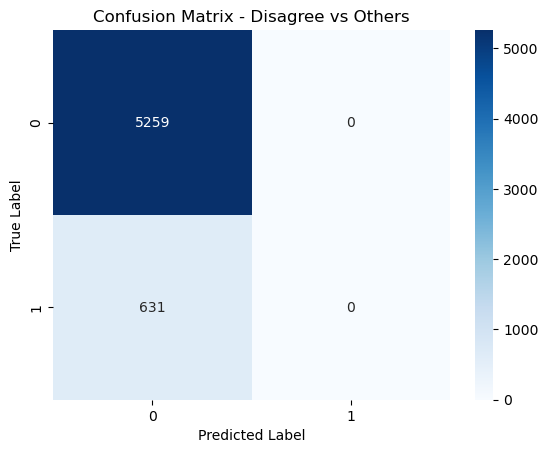

In [116]:
# Each Model Performance
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure `X_test_selected_df` is correctly defined
X_test_selected_df = pd.DataFrame(X_test_selected, columns=selected_features)

# Predict & Evaluate Each Model
for class_label, model in ova_models.items():
    print(f"\n🔹 Evaluating {class_label}")

    # Ensure constant is added to match training input
    X_test_sm = sm.add_constant(X_test_selected_df).reset_index(drop=True)

    # Get the correct binary test labels from `ova_targets`
    y_test_binary = ova_targets[class_label][1].reset_index(drop=True)

    # Predict probabilities
    y_pred_prob = model.predict(X_test_sm)
    y_pred_binary = (y_pred_prob > 0.5).astype(int)  # Default threshold 0.5

    # Compute Accuracy
    acc = accuracy_score(y_test_binary, y_pred_binary)
    print(f"✅ Accuracy for {class_label}: {acc:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_test_binary, y_pred_binary)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {class_label}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()



✅ Overall One-vs-All Accuracy: 0.5462


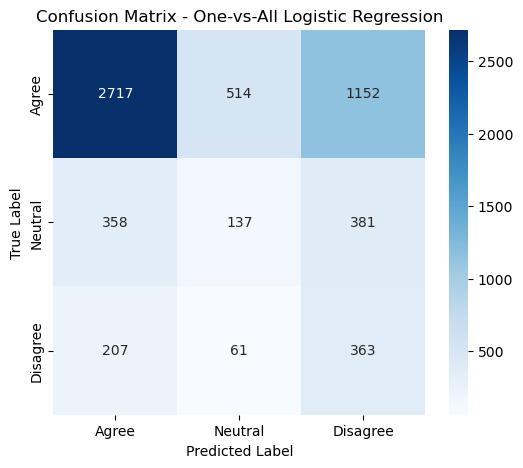

In [118]:
# Overall Evaluation with Optimized Threshold
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve

# Function to compute the best threshold based on Youden's J statistic
def find_best_threshold(y_true, y_scores):
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)
    youden_j = tpr - fpr
    best_threshold = thresholds[np.argmax(youden_j)]
    return best_threshold

# Initialize final predictions to Neutral (Class 2) as default
y_pred_final = np.full(len(X_test_selected_df), 2)  # Default to Neutral

# Add constant to test set for statsmodels prediction
X_test_sm = sm.add_constant(X_test_selected_df)

# Predict probabilities using best models
y_prob_agree = ova_models["Agree vs Others"].predict(X_test_sm)
y_prob_neutral = ova_models["Neutral vs Others"].predict(X_test_sm)
y_prob_disagree = ova_models["Disagree vs Others"].predict(X_test_sm)

# Calculate best thresholds using ROC analysis
best_threshold_agree = find_best_threshold((y_test == 1).astype(int), y_prob_agree)
best_threshold_disagree = find_best_threshold((y_test == 3).astype(int), y_prob_disagree)

# Threshold-based classification using calculated thresholds
y_pred_final[y_prob_agree > best_threshold_agree] = 1  # Assign "Agree"
y_pred_final[y_prob_disagree > best_threshold_disagree] = 3  # Assign "Disagree"
# If neither condition is met, remains Neutral (Class 2)

# Compute overall accuracy
overall_accuracy = accuracy_score(y_test, y_pred_final)
print(f"\n✅ Overall One-vs-All Accuracy: {overall_accuracy:.4f}")

# Compute Confusion Matrix
cm_ova = confusion_matrix(y_test, y_pred_final)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_ova, annot=True, fmt="d", cmap="Blues", xticklabels=["Agree", "Neutral", "Disagree"], yticklabels=["Agree", "Neutral", "Disagree"])
plt.title("Confusion Matrix - One-vs-All Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [120]:
# Re-check VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Compute VIF
X_vif_check = sm.add_constant(X_train_selected_df)  # Add constant for intercept
vif_df = pd.DataFrame()
vif_df["Feature"] = X_vif_check.columns
vif_df["VIF"] = [variance_inflation_factor(X_vif_check.values, i) for i in range(X_vif_check.shape[1])]

print("\n🔹 Variance Inflation Factor (VIF) After Feature Selection:")
print(vif_df.sort_values(by="VIF", ascending=False))


🔹 Variance Inflation Factor (VIF) After Feature Selection:
           Feature       VIF
1     educ_mob_avg  1.996814
2          resp_ed  1.701201
9    gov_trust_mob  1.387429
3    income_decile  1.316840
10    equality_mob  1.253775
4   marital_status  1.156927
7              EQI  1.155830
5       unemp_ever  1.035944
6      unemp_nuts2  1.028293
8           wkhtot  1.020363
0            const  1.000109


In [122]:
# Compute Odds ratios for Interpretation
import numpy as np

# Compute Odds Ratios for each One-vs-All model
for class_label, model in ova_models.items():
    odds_ratios = np.exp(model.params)  # Convert log-odds to odds ratios

    print(f"\n🔹 Odds Ratios for {class_label}:")
    print(odds_ratios)


🔹 Odds Ratios for Agree vs Others:
const             3.202058
educ_mob_avg      1.599149
resp_ed           0.674291
income_decile     0.786673
marital_status    0.922454
unemp_ever        1.092099
unemp_nuts2       1.264510
EQI               0.861850
wkhtot            0.936693
gov_trust_mob     0.850159
equality_mob      0.752321
dtype: float64

🔹 Odds Ratios for Neutral vs Others:
const             0.161136
educ_mob_avg      0.660710
resp_ed           1.317751
income_decile     1.146098
marital_status    1.037284
unemp_ever        0.913961
unemp_nuts2       0.910079
EQI               1.045468
wkhtot            1.004216
gov_trust_mob     1.269256
equality_mob      1.313610
dtype: float64

🔹 Odds Ratios for Disagree vs Others:
const             0.100807
educ_mob_avg      0.714339
resp_ed           1.454343
income_decile     1.341457
marital_status    1.111434
unemp_ever        0.952221
unemp_nuts2       0.704495
EQI               1.254030
wkhtot            1.117347
gov_trust_mob     1.

### 4-5-2 K-Fold Cross-Validation for Model Robustness
<a id="k-fold cross-validation for model robustness"></a>


To assess the **stability** of logistic regression estimates and reduce the risk of **overfitting**, **K-Fold Cross-Validation (CV)** was implemented. The model was trained on different **subsets** of the data across **five folds** to ensure that results were **consistent**.

The **average accuracy** across folds was **56.8%**, slightly lower than the baseline model, with some variation between folds (**55%–58%**), suggesting **sensitivity to training data distribution**. However, **coefficient stability remained strong**, indicating that the relationships identified in the standard **logistic model** were not artifacts of a **single train-test split**.

**K-Fold Cross-Validation** confirmed that the logistic regression model was stable across different training subsets, with an average accuracy of **56.8%**. However, final performance was improved through threshold tuning, which optimized classification boundaries and increased overall accuracy to **64.75%**, though the model still struggled to classify Neutral cases correctly.


In [125]:
# ===================================
# K-Fold CV for each One-vs-All model
# ===================================

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
import numpy as np
import statsmodels.api as sm

# Define number of folds
K = 5  # Change to 10 for robustness

# Store results
cv_results = {}

# Perform K-Fold CV for each One-vs-All model
for class_label, (y_train_binary, _) in ova_targets.items():  # Use training set only
    print(f"\n🔹 Performing {K}-Fold Cross-Validation for {class_label}")

    # Ensure correct alignment with feature selection
    X_cv = sm.add_constant(X_train_selected_df)  # Add constant for logistic regression
    y_cv = y_train_binary.reset_index(drop=True)  # Reset index for alignment

    skf = StratifiedKFold(n_splits=K, shuffle=True, random_state=42)

    # Store fold accuracies
    fold_accuracies = []

    for train_idx, test_idx in skf.split(X_cv, y_cv):
        # Select folds
        X_train_fold, X_test_fold = X_cv.iloc[train_idx], X_cv.iloc[test_idx]
        y_train_fold, y_test_fold = y_cv.iloc[train_idx], y_cv.iloc[test_idx]

        # ✅ Fix: Reset index for alignment
        X_train_fold = X_train_fold.reset_index(drop=True)
        y_train_fold = y_train_fold.reset_index(drop=True)

        # Train Logistic Regression Model
        model = sm.Logit(y_train_fold, X_train_fold).fit(disp=0)

        # Predict on validation fold
        y_pred_fold = (model.predict(X_test_fold) > 0.5).astype(int)

        # Compute accuracy
        fold_accuracy = accuracy_score(y_test_fold, y_pred_fold)
        fold_accuracies.append(fold_accuracy)

    # Store results
    avg_accuracy = np.mean(fold_accuracies)
    cv_results[class_label] = avg_accuracy

    print(f"✅ {class_label} - Avg Accuracy across {K} folds: {avg_accuracy:.4f}")

# Display results
print("\n📊 K-Fold Cross-Validation Summary:")
for class_label, acc in cv_results.items():
    print(f"🔹 {class_label}: {acc:.4f}")



🔹 Performing 5-Fold Cross-Validation for Agree vs Others
✅ Agree vs Others - Avg Accuracy across 5 folds: 0.7484

🔹 Performing 5-Fold Cross-Validation for Neutral vs Others
✅ Neutral vs Others - Avg Accuracy across 5 folds: 0.8511

🔹 Performing 5-Fold Cross-Validation for Disagree vs Others
✅ Disagree vs Others - Avg Accuracy across 5 folds: 0.8930

📊 K-Fold Cross-Validation Summary:
🔹 Agree vs Others: 0.7484
🔹 Neutral vs Others: 0.8511
🔹 Disagree vs Others: 0.8930


In [127]:
# Re-train the Logistic Regression for Interpretation
import statsmodels.api as sm

# Store final models
final_ova_models = {}

#  Train Logistic Regression on Full Dataset
for class_label, (y_train_binary, _) in ova_targets.items():
    print(f"\n🔹 Training Final Logistic Regression for {class_label} on Full Dataset")

    # Ensure correct alignment with feature selection
    X_train_final = sm.add_constant(X_train_selected_df).reset_index(drop=True)  # Reset index for X_train
    y_train_final = y_train_binary.reset_index(drop=True)  # Reset index for y_train

    # Train Logistic Regression Model on full training data
    model = sm.Logit(y_train_final, X_train_final).fit()

    # Store final trained model
    final_ova_models[class_label] = model

    # Print summary for interpretation
    print(model.summary())



🔹 Training Final Logistic Regression for Agree vs Others on Full Dataset
Optimization terminated successfully.
         Current function value: 0.531772
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             inc_redist   No. Observations:                13742
Model:                          Logit   Df Residuals:                    13731
Method:                           MLE   Df Model:                           10
Date:                Fri, 14 Feb 2025   Pseudo R-squ.:                 0.06477
Time:                        02:21:34   Log-Likelihood:                -7307.6
converged:                       True   LL-Null:                       -7813.7
Covariance Type:            nonrobust   LLR p-value:                4.328e-211
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.1638 

🔹 Best Threshold for Agree: 0.427
🔹 Best Threshold for Neutral: 0.153
🔹 Best Threshold for Disagree: 0.135

✅ Final One-vs-All Accuracy (with Threshold Optimization): 0.6475


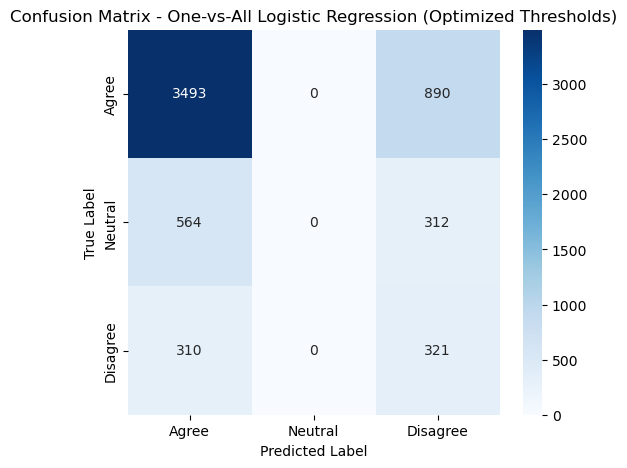

In [129]:
# Overall Evaluation with Optimized Threshold
from sklearn.metrics import precision_recall_curve, accuracy_score, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Step 1: Compute Precision-Recall Curves to Find Best Thresholds
def find_best_threshold(y_true, y_probs):
    precision, recall, thresholds = precision_recall_curve(y_true, y_probs)
    f1_scores = 2 * (precision * recall) / (precision + recall + 1e-9)  # Compute F1 Score
    best_threshold = thresholds[np.argmax(f1_scores)]  # Get threshold with highest F1
    return best_threshold

# Extract binary true labels for each One-vs-All model
y_true_agree = (y_test == 1).astype(int)
y_true_neutral = (y_test == 2).astype(int)
y_true_disagree = (y_test == 3).astype(int)

# Ensure test features are properly formatted
X_test_final = sm.add_constant(X_test_selected_df)

# Get probability predictions from the final logistic regression models
y_prob_agree = final_ova_models["Agree vs Others"].predict(X_test_final)
y_prob_neutral = final_ova_models["Neutral vs Others"].predict(X_test_final)
y_prob_disagree = final_ova_models["Disagree vs Others"].predict(X_test_final)

# Compute best threshold for each class
best_threshold_agree = find_best_threshold(y_true_agree, y_prob_agree)
best_threshold_neutral = find_best_threshold(y_true_neutral, y_prob_neutral)
best_threshold_disagree = find_best_threshold(y_true_disagree, y_prob_disagree)

print(f"🔹 Best Threshold for Agree: {best_threshold_agree:.3f}")
print(f"🔹 Best Threshold for Neutral: {best_threshold_neutral:.3f}")
print(f"🔹 Best Threshold for Disagree: {best_threshold_disagree:.3f}")

# Step 2: Predict Final Class Labels Using Optimized Thresholds
y_pred_final = np.full(len(X_test_final), 2)  # Default class: Neutral

# Assign class labels using the optimized thresholds
y_pred_final[y_prob_agree > best_threshold_agree] = 1  # Assign "Agree"
y_pred_final[y_prob_disagree > best_threshold_disagree] = 3  # Assign "Disagree"

# Step 3: Compute Overall Accuracy
final_accuracy = accuracy_score(y_test, y_pred_final)
print(f"\n✅ Final One-vs-All Accuracy (with Threshold Optimization): {final_accuracy:.4f}")

# Step 4: Confusion Matrix
cm_ova = confusion_matrix(y_test, y_pred_final)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_ova, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Agree", "Neutral", "Disagree"],
            yticklabels=["Agree", "Neutral", "Disagree"])
plt.title("Confusion Matrix - One-vs-All Logistic Regression (Optimized Thresholds)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


### 4-5-3 Hyperparameter Tuning with GridSearchCV
<a id="hyperparameter tuning with GridSearchCV"></a>

To improve the **stability** and **generalization** of logistic regression, **GridSearchCV** was implemented to tune key **hyperparameters**, including **Regularization strength (C)**, **Penalty type (L1 vs. L2)**, **Solver choice (liblinear)**.

After tuning, the **best model** used **L2 regularization (Ridge) with C = 1**, which helped **stabilize coefficient estimates** by preventing extreme values. However, despite these optimizations, the final **accuracy (56.64%)** was **lower** than the baseline logistic regression.

The **confusion matrix** after **threshold optimization** highlights the continued **difficulty in distinguishing Neutral cases**, where almost all Neutral instances were **misclassified** as either: **Agree (487)**, **Disagree (387)**.

Compared to previous models, slightly **better Disagree predictions** were observed, but **Neutral classification remained unreliable**, reinforcing that **logistic regression struggles** with the **middle category in ordinal responses**.


In [132]:
# ======================================
# GridSearchCV for each One-vs-All Model
# ======================================

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import StandardScaler

# Ensure feature selection is applied before GridSearchCV
X_train_final = X_train_selected_df  # Use already selected features
y_train_final = y_train  # Use original training labels

# Define One-vs-All Logistic Regression Pipeline
logreg_pipeline = Pipeline([
    ("scaler", StandardScaler()),  # Standardize features
    ("classifier", OneVsRestClassifier(LogisticRegression(class_weight="balanced", random_state=42)))
])

# Define parameter grid (correctly referencing the estimator inside the pipeline)
param_grid = {
    "classifier__estimator__C": [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    "classifier__estimator__penalty": ["l1", "l2"],  # Lasso (L1) and Ridge (L2)
    "classifier__estimator__solver": ["liblinear"],  # Solvers supporting L1 & L2
    "classifier__estimator__max_iter": [100, 500, 1000],  # Iterations for convergence
}

# Use Stratified K-Fold for balanced cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [134]:
best_models = {}
best_scores = {}

# Perform GridSearchCV for each One-vs-All classification task
for class_label, (y_train_bin, y_test_bin) in {
    "Agree": (y_train_agree, y_test_agree),
    "Neutral": (y_train_neutral, y_test_neutral),
    "Disagree": (y_train_disagree, y_test_disagree)
}.items():
    print(f"\n🔹 Tuning Logistic Regression for {class_label} vs Others")

    # Run GridSearchCV
    grid_search = GridSearchCV(logreg_pipeline, param_grid, cv=cv, scoring="accuracy", n_jobs=-1, verbose=2)
    grid_search.fit(X_train_selected_df, y_train_bin)  # Fit on the selected training data

    # Store Best Model & Score
    best_models[class_label] = grid_search.best_estimator_
    best_scores[class_label] = grid_search.best_score_

    # Print Best Parameters
    print(f"\n✅ Best Hyperparameters for {class_label}: {grid_search.best_params_}")
    print(f"📌 Best CV Accuracy for {class_label}: {grid_search.best_score_:.4f}")

# Display All Results
print("\n📊 Final GridSearchCV Summary:")
for class_label, score in best_scores.items():
    print(f"🔹 {class_label}: Best CV Accuracy = {score:.4f}")



🔹 Tuning Logistic Regression for Agree vs Others
Fitting 5 folds for each of 36 candidates, totalling 180 fits

✅ Best Hyperparameters for Agree: {'classifier__estimator__C': 10, 'classifier__estimator__max_iter': 100, 'classifier__estimator__penalty': 'l1', 'classifier__estimator__solver': 'liblinear'}
📌 Best CV Accuracy for Agree: 0.6287

🔹 Tuning Logistic Regression for Neutral vs Others
Fitting 5 folds for each of 36 candidates, totalling 180 fits

✅ Best Hyperparameters for Neutral: {'classifier__estimator__C': 0.001, 'classifier__estimator__max_iter': 100, 'classifier__estimator__penalty': 'l1', 'classifier__estimator__solver': 'liblinear'}
📌 Best CV Accuracy for Neutral: 0.8513

🔹 Tuning Logistic Regression for Disagree vs Others
Fitting 5 folds for each of 36 candidates, totalling 180 fits

✅ Best Hyperparameters for Disagree: {'classifier__estimator__C': 0.001, 'classifier__estimator__max_iter': 100, 'classifier__estimator__penalty': 'l1', 'classifier__estimator__solver': 'li

In [136]:
print(f"Available keys in ova_targets: {ova_targets.keys()}")

Available keys in ova_targets: dict_keys(['Agree vs Others', 'Neutral vs Others', 'Disagree vs Others'])


Available keys in ova_targets: dict_keys(['Agree vs Others', 'Neutral vs Others', 'Disagree vs Others'])

🔹 Evaluating Agree vs Others
✅ Accuracy for Agree: 0.6221


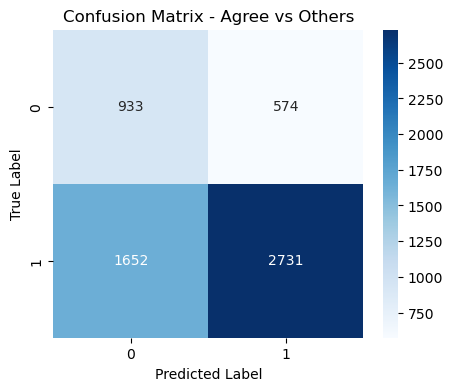


🔹 Evaluating Neutral vs Others
✅ Accuracy for Neutral: 0.8513


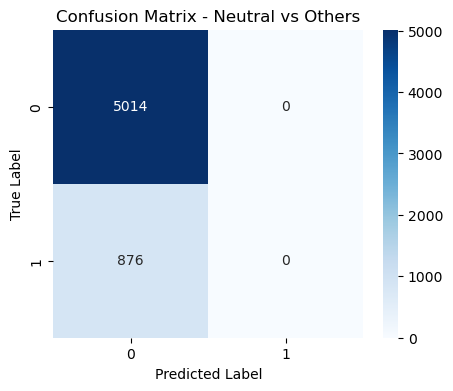


🔹 Evaluating Disagree vs Others
✅ Accuracy for Disagree: 0.4798


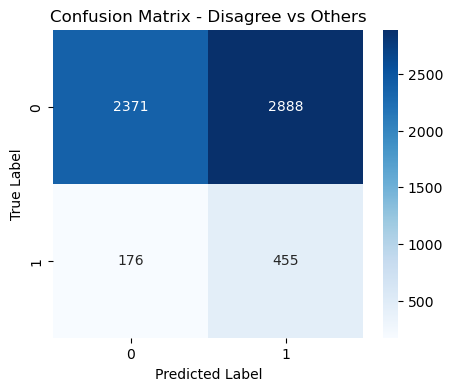


📊 Final Model Evaluation Summary:
🔹 Agree: Accuracy = 0.6221
🔹 Neutral: Accuracy = 0.8513
🔹 Disagree: Accuracy = 0.4798


In [138]:
# Evaluate Each One-vs-All Model
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Store results
model_eval_results = {}

# Check available keys
print(f"Available keys in ova_targets: {ova_targets.keys()}")

# Correct key mapping
key_mapping = {
    "Agree": "Agree vs Others",
    "Neutral": "Neutral vs Others",
    "Disagree": "Disagree vs Others"
}

# Predict and Evaluate Each One-vs-All Model
for class_label, model in best_models.items():
    mapped_key = key_mapping[class_label]  # Ensure correct key mapping

    print(f"\n🔹 Evaluating {class_label} vs Others")

    # Ensure correct test labels
    y_test_bin = ova_targets[mapped_key][1].reset_index(drop=True)  # Get binary labels
    X_test_final = X_test_selected_df  # Use selected test features

    # Predict on test set
    y_pred_bin = model.predict(X_test_final)

    # Compute Accuracy
    accuracy = accuracy_score(y_test_bin, y_pred_bin)
    print(f"✅ Accuracy for {class_label}: {accuracy:.4f}")

    # Compute Confusion Matrix
    cm = confusion_matrix(y_test_bin, y_pred_bin)
    
    # Plot Confusion Matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {class_label} vs Others")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

    # Store results
    model_eval_results[class_label] = {
        "accuracy": accuracy,
        "confusion_matrix": cm
    }

# Print Final Evaluation Summary
print("\n📊 Final Model Evaluation Summary:")
for class_label, metrics in model_eval_results.items():
    print(f"🔹 {class_label}: Accuracy = {metrics['accuracy']:.4f}")


In [140]:
# Identify Optimized Threshold
from sklearn.metrics import precision_recall_curve
import numpy as np

# Store best thresholds
best_thresholds = {}

# Find Optimal Threshold for Each Class
for class_label, model in best_models.items():
    mapped_key = key_mapping[class_label]  # Ensure correct key mapping

    print(f"\n🔹 Finding Optimal Threshold for {class_label}")

    # Get correct test labels
    y_test_bin = ova_targets[mapped_key][1].reset_index(drop=True)  # Binary labels
    X_test_final = X_test_selected_df  # Use selected test features

    # Ensure the model supports `predict_proba`
    if hasattr(model, "predict_proba"):
        y_prob_bin = model.predict_proba(X_test_final)[:, 1]  # Probability for positive class
    else:
        print(f"⚠️ Warning: Model for {class_label} does not support `predict_proba`. Using `predict` instead.")
        y_prob_bin = model.predict(X_test_final)  # Use raw predictions instead

    # Compute Precision-Recall Curve
    precision, recall, thresholds = precision_recall_curve(y_test_bin, y_prob_bin)

    # Compute F1 scores for different thresholds
    f1_scores = 2 * (precision * recall) / (precision + recall + 1e-9)

    # Get best threshold based on highest F1 score
    best_threshold = thresholds[np.argmax(f1_scores)]
    best_thresholds[class_label] = best_threshold

    print(f"✅ Best Threshold for {class_label}: {best_threshold:.3f}")

# Print Final Optimal Thresholds
print("\n📊 Final Optimal Thresholds Summary:")
for class_label, threshold in best_thresholds.items():
    print(f"🔹 {class_label}: {threshold:.3f}")



🔹 Finding Optimal Threshold for Agree
✅ Best Threshold for Agree: 0.201

🔹 Finding Optimal Threshold for Neutral
✅ Best Threshold for Neutral: 0.500

🔹 Finding Optimal Threshold for Disagree
✅ Best Threshold for Disagree: 0.511

📊 Final Optimal Thresholds Summary:
🔹 Agree: 0.201
🔹 Neutral: 0.500
🔹 Disagree: 0.511



✅ Final One-vs-All Accuracy (After Thresholding): 0.5664


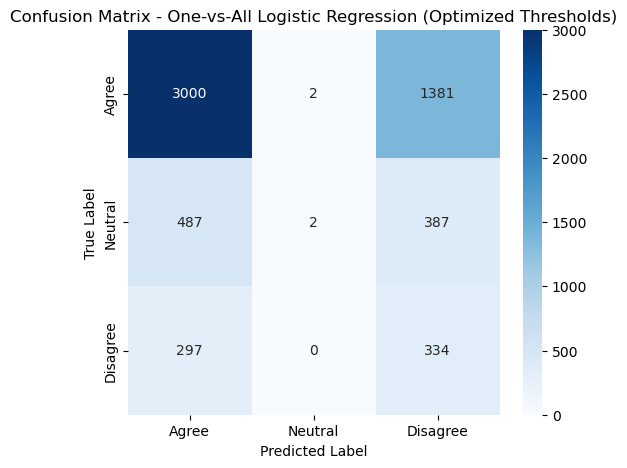

In [142]:
# Overall Evaluation with Optimized Threshold
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure correct feature selection
X_test_final = X_test_selected_df  # Use selected test features

# Default prediction: Neutral (Class 2)
y_pred_final = np.full(len(X_test_final), 2)  

# Compute probability scores for each class (if supported)
y_prob_agree = best_models["Agree"].predict_proba(X_test_final)[:, 1] if hasattr(best_models["Agree"], "predict_proba") else best_models["Agree"].predict(X_test_final)
y_prob_neutral = best_models["Neutral"].predict_proba(X_test_final)[:, 1] if hasattr(best_models["Neutral"], "predict_proba") else best_models["Neutral"].predict(X_test_final)
y_prob_disagree = best_models["Disagree"].predict_proba(X_test_final)[:, 1] if hasattr(best_models["Disagree"], "predict_proba") else best_models["Disagree"].predict(X_test_final)

# ssign class labels based on optimized thresholds
y_pred_final[y_prob_agree > best_thresholds["Agree"]] = 1  # Assign "Agree"
y_pred_final[y_prob_disagree > best_thresholds["Disagree"]] = 3  # Assign "Disagree"

# Compute Overall Accuracy
final_accuracy = accuracy_score(y_test, y_pred_final)
print(f"\n✅ Final One-vs-All Accuracy (After Thresholding): {final_accuracy:.4f}")

# Compute Final Confusion Matrix
cm_ova = confusion_matrix(y_test, y_pred_final)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_ova, annot=True, fmt="d", cmap="Blues", xticklabels=["Agree", "Neutral", "Disagree"], yticklabels=["Agree", "Neutral", "Disagree"])
plt.title("Confusion Matrix - One-vs-All Logistic Regression (Optimized Thresholds)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [144]:
# Extract coefficients 
import pandas as pd

# Store coefficients and intercepts
coef_dict = {}
intercept_dict = {}

# Extract coefficients from each model
for class_label, model_pipeline in best_models.items():
    print(f"\n🔹 Extracting Coefficients for {class_label} vs Others")

    # Extract OneVsRestClassifier
    one_vs_rest_model = model_pipeline.named_steps["classifier"]

    # Ensure we are accessing the correct logistic regression model
    best_logreg_model = one_vs_rest_model.estimators_[0]  # Extracts the logistic regression estimator

    # Store coefficients and intercepts
    coef_dict[class_label] = best_logreg_model.coef_.flatten()  # Convert to 1D array
    intercept_dict[class_label] = best_logreg_model.intercept_[0]

# Convert to DataFrame for better visualization
coef_df = pd.DataFrame(coef_dict, index=X_train_selected_df.columns)  # Use selected features
intercept_df = pd.DataFrame(intercept_dict, index=["Intercept"])

# Display coefficient table
print("\n🔹 Logistic Regression Coefficients:")
display(coef_df)

# Display intercept table
print("\n🔹 Intercepts:")
display(intercept_df)



🔹 Extracting Coefficients for Agree vs Others

🔹 Extracting Coefficients for Neutral vs Others

🔹 Extracting Coefficients for Disagree vs Others

🔹 Logistic Regression Coefficients:


,Agree,Neutral,Disagree
educ_mob_avg,0.472954,0.0,0.000000
resp_ed,-0.406471,0.0,0.000000
income_decile,-0.232760,0.0,0.074424
marital_status,-0.077643,0.0,0.000000
unemp_ever,0.089761,0.0,0.000000
unemp_nuts2,0.218527,0.0,-0.041622
EQI,-0.159015,0.0,0.000000
wkhtot,-0.059602,0.0,0.000000
gov_trust_mob,-0.162110,0.0,0.000000
equality_mob,-0.284163,0.0,0.000000



🔹 Intercepts:


,Agree,Neutral,Disagree
Intercept,0.096068,0.0,0.0


This analysis highlights the **trade-off between predictive accuracy and interpretability** in modeling attitudes toward **income redistribution**. While **logistic regression** provided clear insights into how **educational mobility, income level, and trust in government** shape preferences, its **predictive performance was limited**, particularly for the **Neutral** and **Disagree** categories. 

**Naïve Bayes** and **ensemble models** (*Random Forest + Naïve Bayes*) improved **classification accuracy to 61.2%**, but no model achieved **consistently strong performance across all classes**. **Predictive models** prioritized **classification accuracy**, while **interpretive models** revealed key **socioeconomic influences** on redistribution attitudes.

Ultimately, **future research** should explore more **flexible approaches**, such as **interpretable machine learning** or **hierarchical models**, to better capture both **predictive power** and **explanatory depth**.

## 5. Limitations
<a id="limitations"></a>

This analysis has several limitations that stem from both **data constraints** and **methodological challenges**. 

First, the dependent variable (`inc_redist`) exhibits significant **class imbalance**, where approximately **74%** of respondents favor redistribution, while only **15%** are neutral and **10%** disagree. This imbalance reflects both **real-world attitudes** as redistribution policies tend to have broad support and **survey biases**, such as overrepresentation of particular demographic groups or socially desirable responses (**King & Zeng, 2001**). The difficulty in predicting **Neutral** and **Disagree** categories suggests that these groups may be more heterogeneous, requiring additional predictors or different modeling strategies.

Second, **feature selection** and **model specification challenges** may have influenced results. While **educational mobility** was the primary predictor of interest, **regional** and broader **socioeconomic factors** often dominated its effect, making it harder to isolate its true impact. This aligns with previous research showing that **structural economic conditions** and **institutional trust** often play a more significant role in shaping redistributive preferences than individual-level characteristics (**Gelman & Hill, 2007**). The models also assume that attitudes toward redistribution are shaped by **observable factors**, but **unmeasured variables** such as political ideology, exposure to inequality, or personal economic experiences were not included, potentially introducing **omitted variable bias**.

Third, the reliance on **categorical variable coding** and **logistic regression modeling** presents constraints in **granularity** and **interpretation**. The logistic regression model, while interpretable, assumes **linearity in the log-odds relationship**, which may oversimplify complex interactions between socioeconomic factors. Additionally, the categorization of **income redistribution preferences** into three discrete classes may lose information about the **intensity** of respondents' views, as **ordinal** or **continuous scaling** could better capture gradual shifts in opinion. Future research could explore **hierarchical** or **latent variable models** to better account for underlying heterogeneity in preferences (**Hastie et al., 2009**).

Lastly, **modeling performance** varied significantly across different approaches, highlighting the **trade-off between interpretability and predictive power**. While **logistic regression** allowed for coefficient interpretation, its performance in predicting minority classes was weak. **Naïve Bayes** provided better handling of class probabilities but suffered from **oversimplified assumptions**, and ensemble methods like **Random Forest** improved accuracy for the majority class but remained ineffective in predicting **Neutral** and **Disagree** responses. These limitations suggest that future studies should consider a **combination of interpretable models** with more **flexible machine learning approaches**, such as **XGBoost** or **LightGBM**, while ensuring that **class imbalance** and **feature dominance** do not distort conclusions.



## 6. Summary
<a id="summary"></a>
This analysis examined the determinants of income redistribution preferences, emphasizing the influence of income, educational mobility, and trust in government. These findings align with prior studies, suggesting that geographical, demographic, and economic factors play critical roles in shaping redistribution preferences. Based on these findings, policymakers should focus on addressing unemployment, promoting educational equity, and tailoring redistribution policies to regional needs. Additionally, businesses can align corporate social responsibility (CSR) initiatives with regional disparities, focusing on education and workforce development. While this analysis successfully identifies key socioeconomic determinants of redistributive preferences, the dataset’s imbalance, feature interactions, and modeling constraints present challenges in both predictive performance and interpretability. Addressing these limitations in future work—through improved data collection, alternative modeling strategies, and better handling of heterogeneity, which could provide deeper insights into public attitudes toward redistribution.


## 7. References
<a id="references"></a>
Alesina, A., & Giuliano, P. (2011). Preferences for redistribution. Handbook of Social Economics, 1A, 93–131.

Alesina, A., Stantcheva, S., & Teso, E. (2018). Intergenerational mobility and preferences for redistribution. American Economic Review, 108(2), 521–554. https://doi.org/10.1257/aer.20162015

Charron, N., Lapuente, V., Bauhr, M., & Annoni, P. (2022). Change and continuity in quality of government: Trends in subnational quality of government in EU member states. Investigaciones Regionales-Journal of Regional Research, 2022(53), 5–23. https://doi.org/10.38191/iirr-jorr.22.008

European Social Survey (ESS). (2024). ESS10 Multilevel Data, edition 1.0. ESS Data Portal. https://ess.sikt.no/en/datafile/1ae049b3-0bc3-408e-91a0-0546b2d02cce/35?tab=0

Gelman, A., & Hill, J. (2007). Data analysis using regression and multilevel/hierarchical models. Cambridge University Press.

Hastie, T., Tibshirani, R., & Friedman, J. (2009). The elements of statistical learning. Springer.

Jerrim, J., & Macmillan, L. (2015). Income inequality, intergenerational mobility, and the Great Gatsby Curve: Is education the key? Social Forces, 94(2), 505–533. https://doi.org/10.1093/sf/sov075

King, G., & Zeng, L. (2001). Logistic regression in rare events data. Political Analysis, 9(2), 137–163.

Knack, S., & Keefer, P. (1997). Does social capital have an economic payoff? A cross-country investigation. The Quarterly Journal of Economics, 112(4), 1251–1288. https://doi.org/10.1162/003355300555475

Lindh, A., & Andersson, A. B. (2024). Social networks and distributive conflict: The class divide in social ties and attitudes to income inequality across 29 countries. European Sociological Review, XX, 1–16. https://doi.org/10.1093/esr/jcae039

## 8. Appendix
<a id="appendix"></a>

### 8-1. Table
<a id="table"></a>

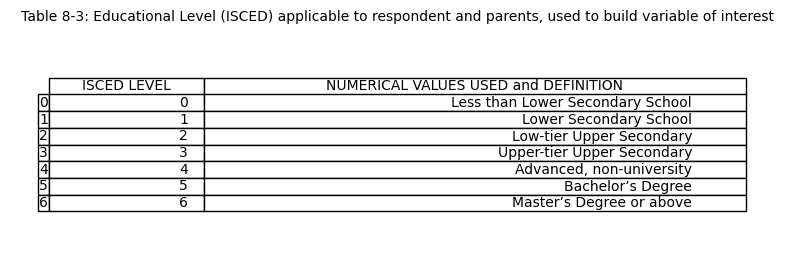

In [152]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import table

# Data for the table
data = {
    "ISCED LEVEL": [0, 1, 2, 3, 4, 5, 6],
    "NUMERICAL VALUES USED and DEFINITION": [
        "Less than Lower Secondary School",
        "Lower Secondary School",
        "Low-tier Upper Secondary",
        "Upper-tier Upper Secondary",
        "Advanced, non-university",
        "Bachelor’s Degree",
        "Master’s Degree or above",
    ],
}

# Create a DataFrame
df = pd.DataFrame(data)

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 3))  # Adjust figure size as needed
ax.axis("tight")
ax.axis("off")

# Create the table
table(ax, df, loc="center", colWidths=[0.2, 0.7])  # Adjust column width as needed

# Add title
plt.title("Table 8-3: Educational Level (ISCED) applicable to respondent and parents, used to build variable of interest", fontsize=10)

# Save the table as an image (optional)
plt.savefig("educational_level_table.png", bbox_inches="tight", dpi=300)

# Show the table
plt.show()